In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.histomics import reg_edge, vesselness
import tables
from IPython.display import display, Javascript
from modules import utility
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()

def DRLS(img,rad=30, scale=255, sigma=0.5, alpha=0.4, lamda=1.0, iter=200):
    imgt = np.zeros_like(img).astype(float)
    rad = 30
    h,w = imgt.shape
    for i in range(imgt.shape[0]):
        for j in range(imgt.shape[1]):
            if np.sqrt((i-h/2)**2+(j-w/2)**2) <= rad:
                imgt[i,j]=-1.0
                
    ls = reg_edge(img.astype(float)*scale,imgt.astype(float),sigma=sigma,alpha=alpha, lamda=lamda,iter=iter)
    
    conts = utility.marchingSquares(-ls.astype(np.float32),iso=0.0,mode='center')
    
    ls = utility.threshold(-ls,0.0)
    
    return ls,conts

Using TensorFlow backend.


<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [2]:
#######################################################
# Get data
#######################################################
data_path = '/media/marsdenlab/Data2/datasets/DeepLofting/'

#ct data
CODE ='ct'
train = data_path+'train_192_ct.hdf5'
val = data_path+'val_192_ct.hdf5'
test = data_path+'test_192_ct.hdf5'

#mr data
# CODE ='mr'
# train = data_path+'train_192_mr.hdf5'
# val = data_path+'val_192_mr.hdf5'
# test = data_path+'test_192_mr.hdf5'


f_train = tables.open_file(train)
f_val = tables.open_file(val)


input_shape = f_train.root.X.shape
output_shape = f_train.root.Y.shape
print input_shape, output_shape

print 'data shapes, train={},{}'.format(input_shape,output_shape)
print f_val.root.X.shape
print f_val.root.X.dtype
N = f_train.root.X.shape[0]

(141035, 192, 192, 1) (141035, 192, 192, 1)
data shapes, train=(141035, 192, 192, 1),(141035, 192, 192, 1)
(8500, 192, 192, 1)
float16


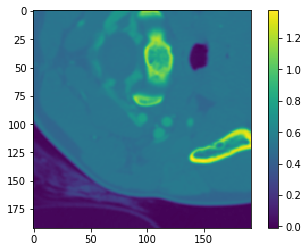

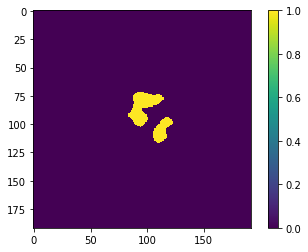

In [3]:
img = f_val.root.X[2500,:,:,0].astype(float)
plt.imshow(img.astype(np.float32))
plt.colorbar()
plt.show()

plt.figure()
seg,conts = DRLS(img)
plt.imshow(seg.astype(np.float32))
plt.colorbar()
plt.show()

In [4]:
mu = 0.3
lamda = 1.5
alpha = 0.65
R = 40

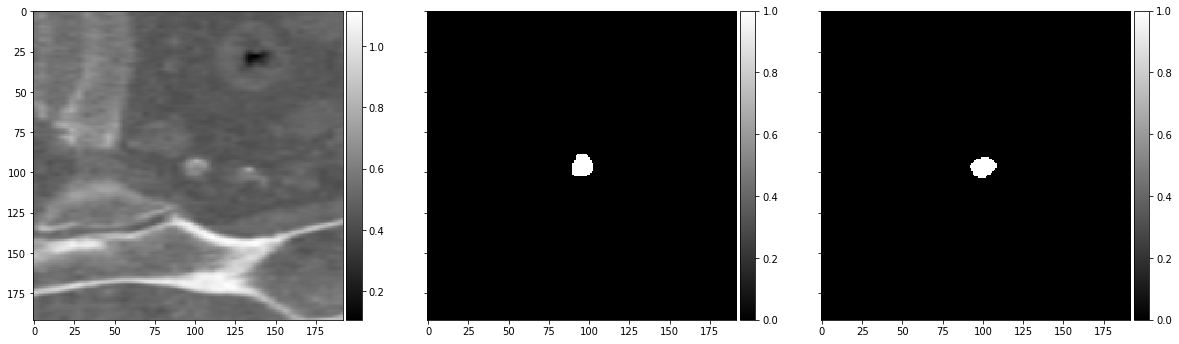

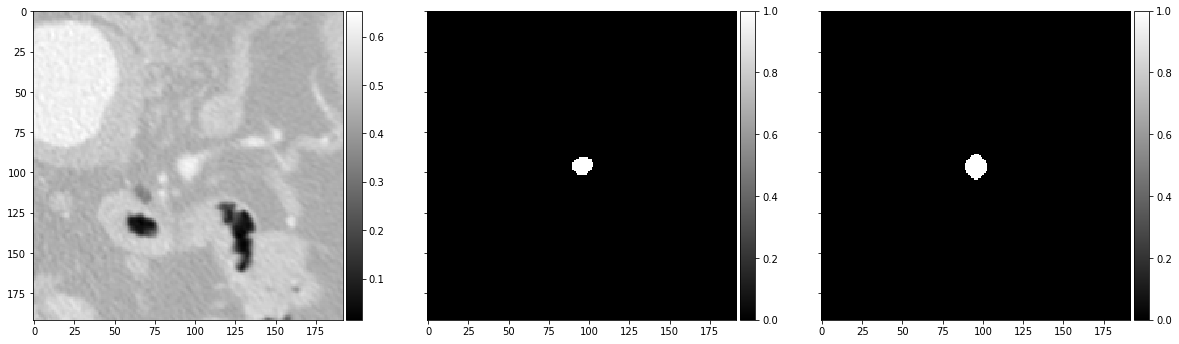

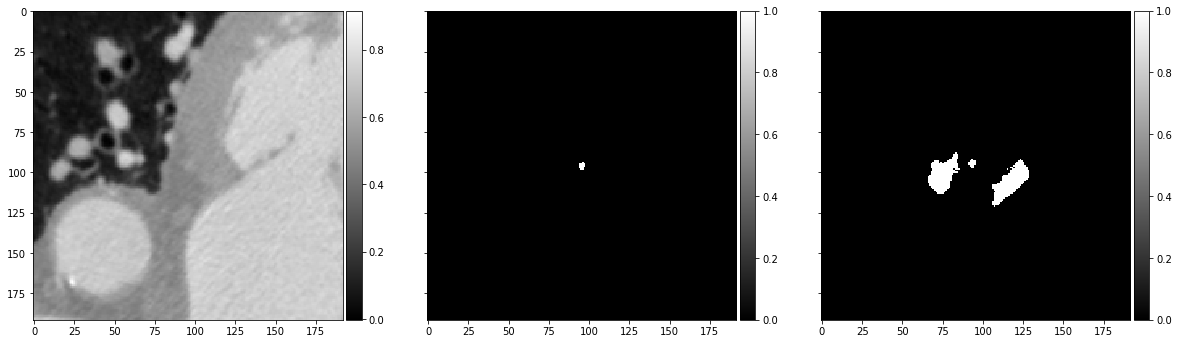

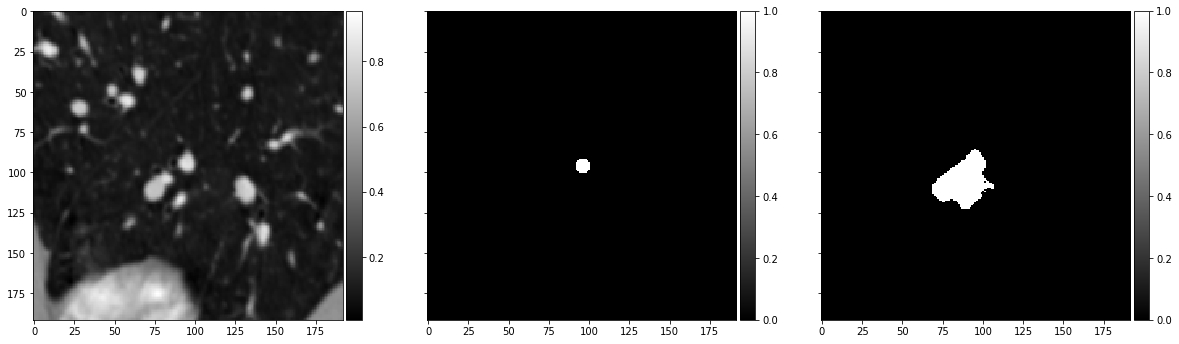

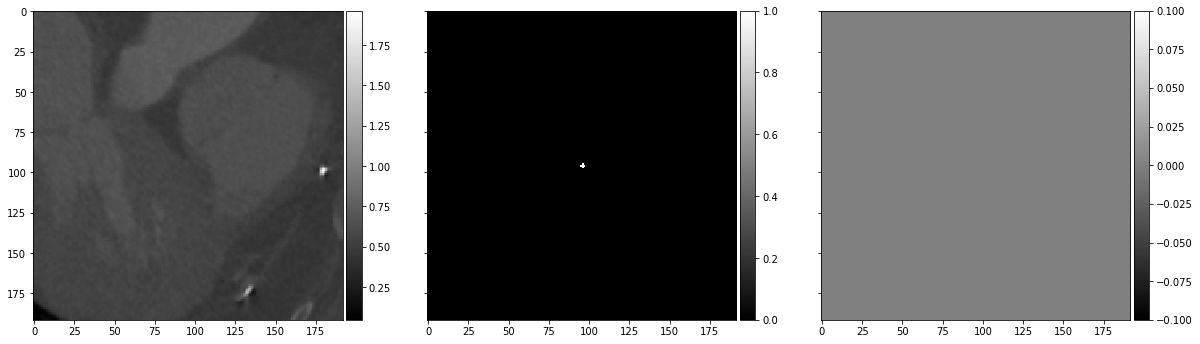

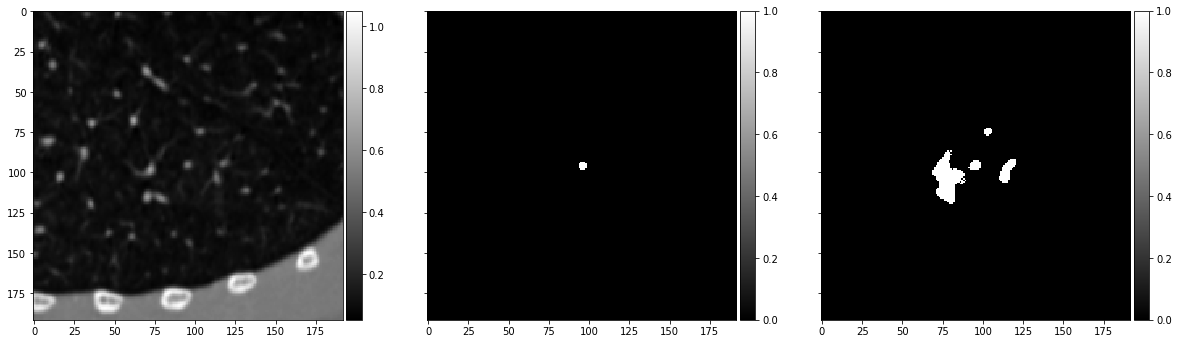

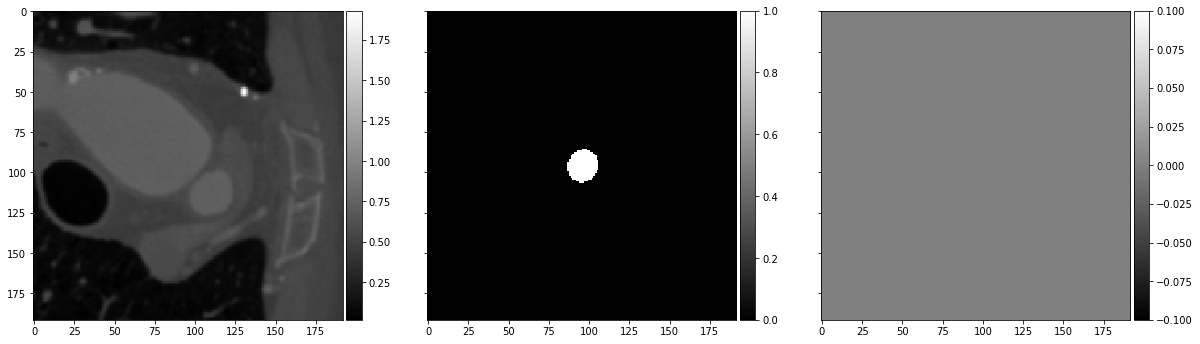

In [5]:
######################################################
# Plot
######################################################

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['figure.figsize'] = (20.0, 10.0)
def implot(mp,ax):
    im = ax.imshow(mp.astype(np.float32), cmap='gray')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
 
for i in range(7):
    j = np.random.randint(N)
    im = f_train.root.X[j,:,:,0].astype(float)
    truth = f_train.root.Y[j,:,:,0].astype(float)
    seg,conts = DRLS(im,rad=R,alpha=alpha,lamda=lamda)
    plt.figure()
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
    implot(im,ax1)
    implot(truth,ax2)
    implot(seg,ax3)
    plt.tight_layout
    plt.show()

In [6]:
f_test = tables.open_file(test)
X = f_test.root.X
Y = f_test.root.Y
print X.shape
print Y.shape
N,H,W,C = X.shape

(31588, 192, 192, 1)
(31588, 192, 192, 1)


In [7]:
segs = np.zeros((N,H,W))
conts = []
for i in range(N):
    if i%1000 == 0:
        print i
    img = X[i,:,:,0]
    seg,cont = DRLS(img,rad=R,alpha=alpha,lamda=lamda)
    segs[i] = seg
    conts.append(cont)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000


In [8]:
np.save('drls_segs_{}.npy'.format(CODE),segs)
np.save('drls_conts_{}.npy'.format(CODE),conts)

In [16]:
segs = np.load('drls_segs_{}.npy'.format(CODE))
conts = np.load('drls_conts_{}.npy'.format(CODE))

In [25]:
#mr data
CODE ='mr'
train = data_path+'train_192_mr.hdf5'
val = data_path+'val_192_mr.hdf5'
test = data_path+'test_192_mr.hdf5'

f_train = tables.open_file(train)
f_val = tables.open_file(val)
f_test = tables.open_file(test)

X = f_test.root.X
Y = f_test.root.Y
print X.shape
print Y.shape
N,H,W,C = X.shape

(26655, 192, 192, 1)
(26655, 192, 192, 1)


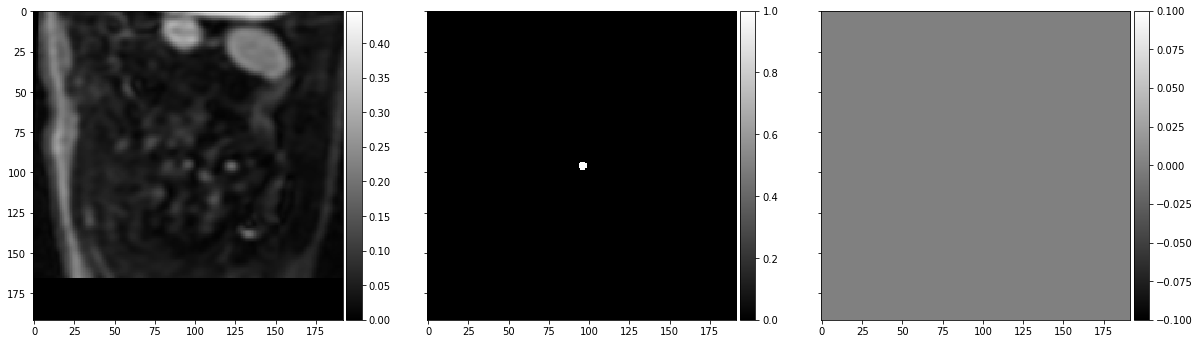

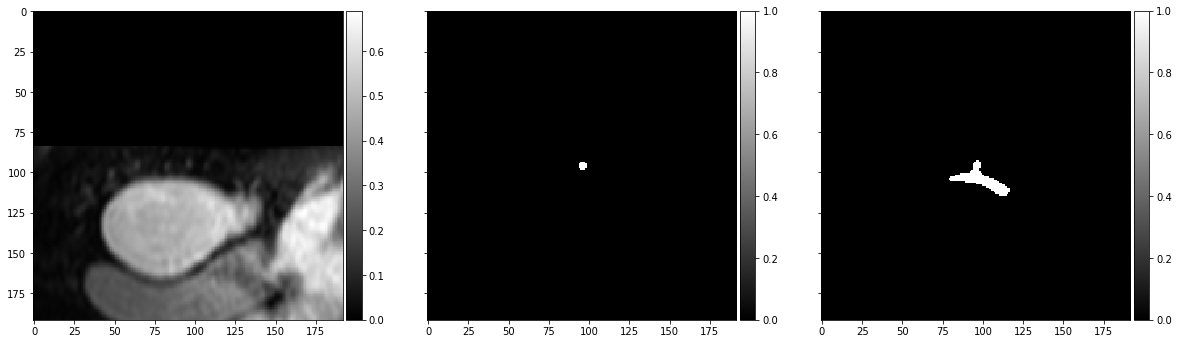

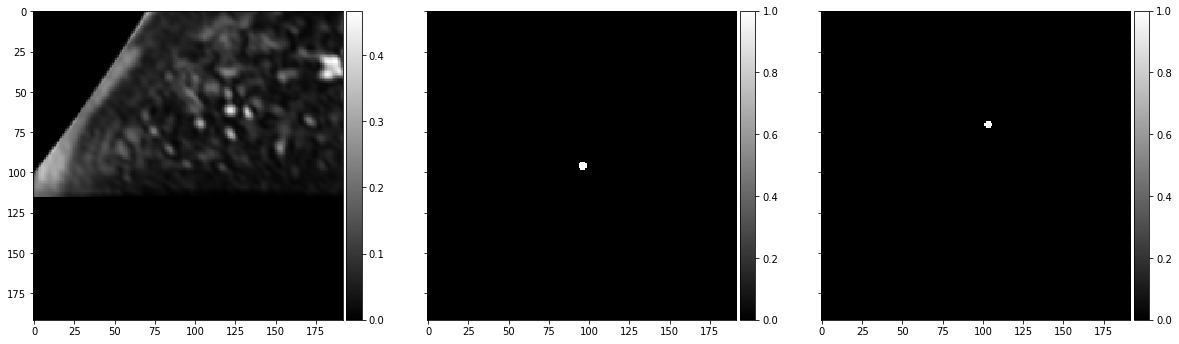

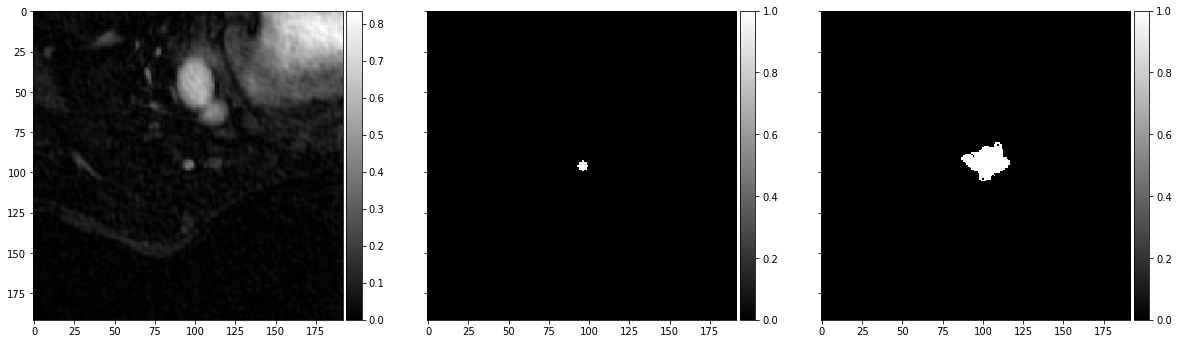

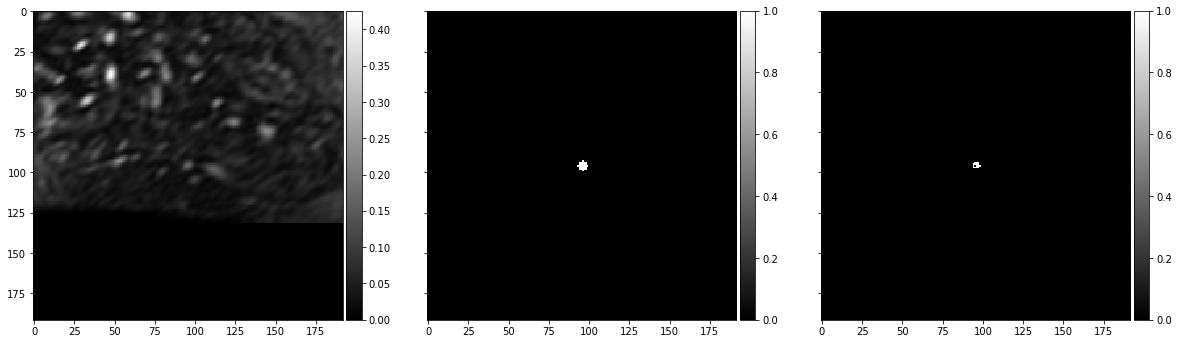

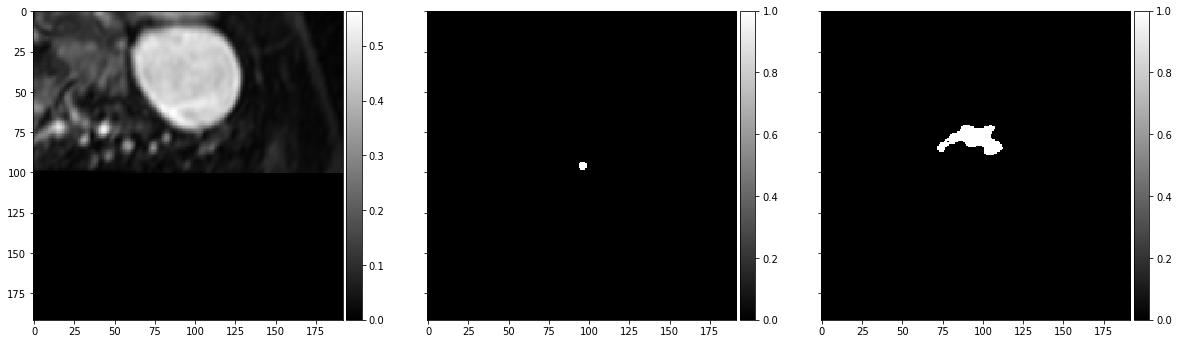

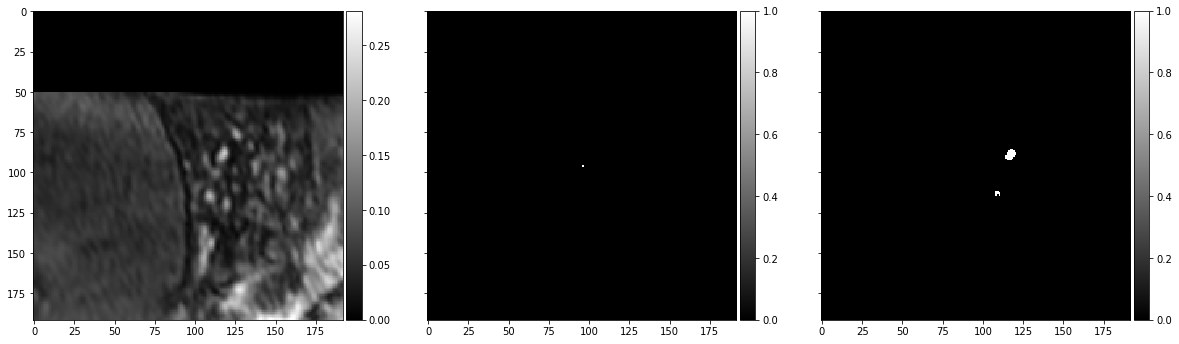

In [33]:
mu = 0.3
lamda = 1.5
alpha = 0.55
R = 30

for i in range(7):
    j = np.random.randint(N)
    im = f_train.root.X[j,:,:,0].astype(float)
    truth = f_train.root.Y[j,:,:,0].astype(float)
    seg,conts = DRLS(im,rad=R,alpha=alpha,lamda=lamda)
    plt.figure()
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
    implot(im,ax1)
    implot(truth,ax2)
    implot(seg,ax3)
    plt.tight_layout
    plt.show()

In [ ]:
segs = np.zeros((N,H,W))
conts = []
for i in range(N):
    if i%1000 == 0:
        print i
    img = X[i,:,:,0]
    seg,cont = DRLS(img,rad=R,alpha=alpha,lamda=lamda)
    segs[i] = seg
    conts.append(cont)

0
1000
2000
3000
4000
5000
6000
7000


In [ ]:
np.save('drls_segs_{}.npy'.format(CODE),segs)
np.save('drls_conts_{}.npy'.format(CODE),conts)

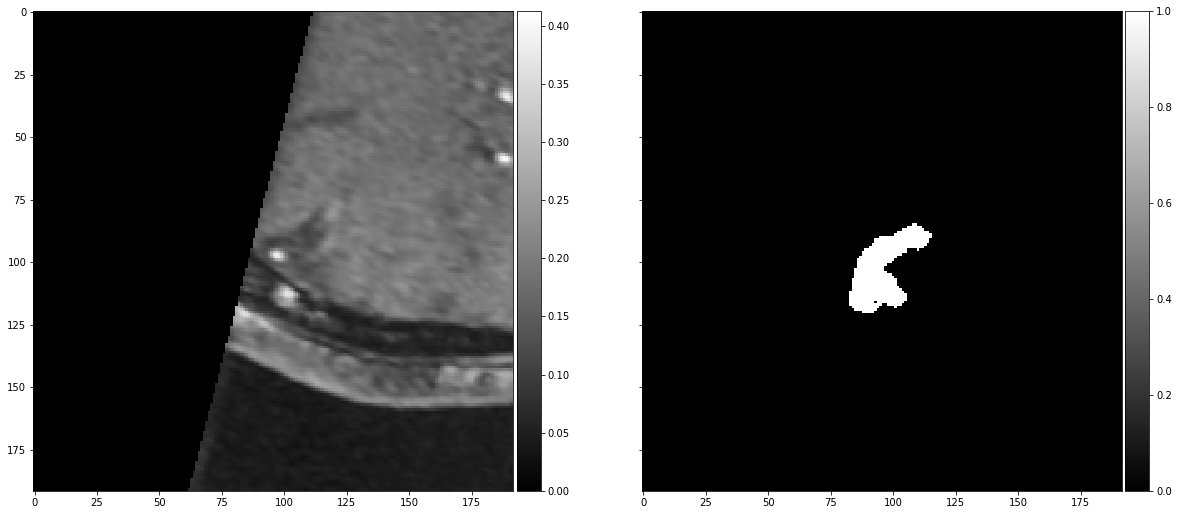

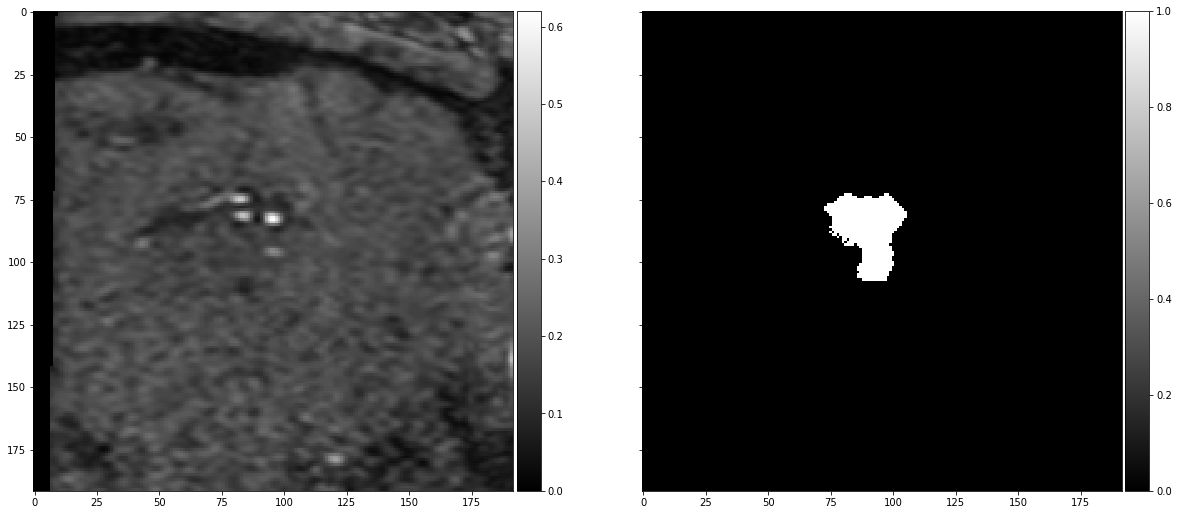

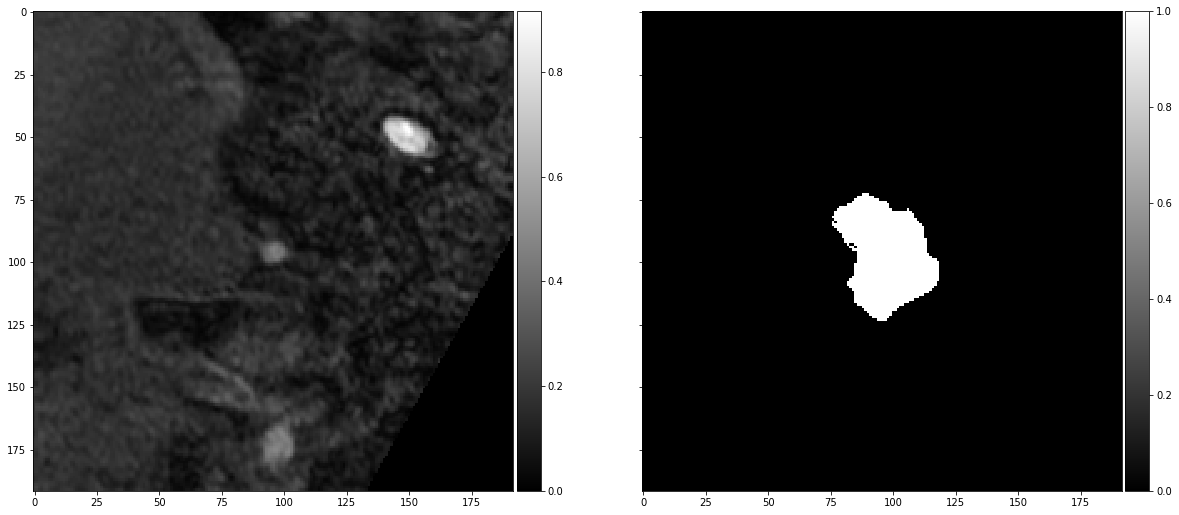

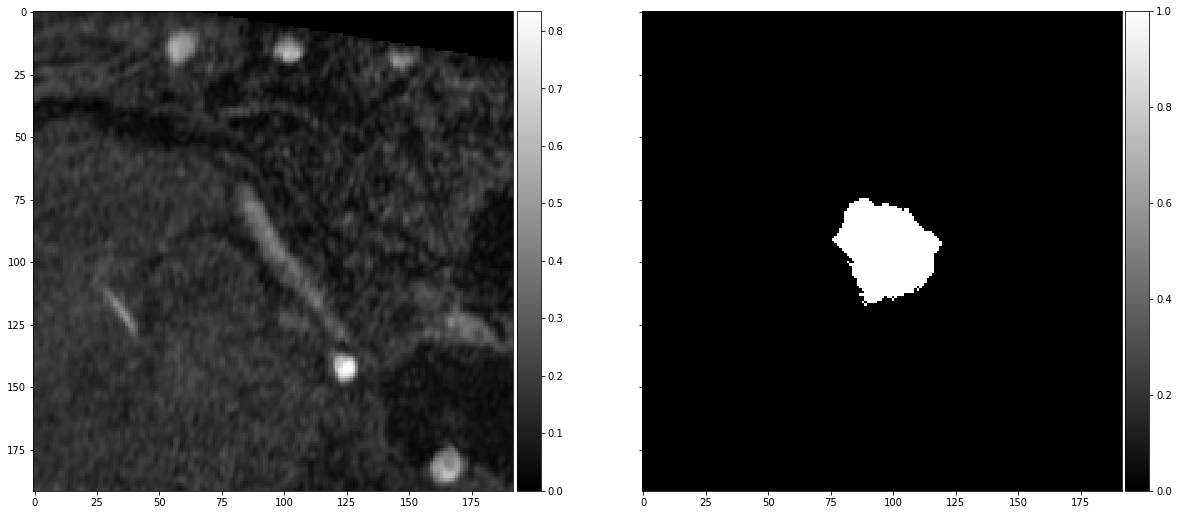

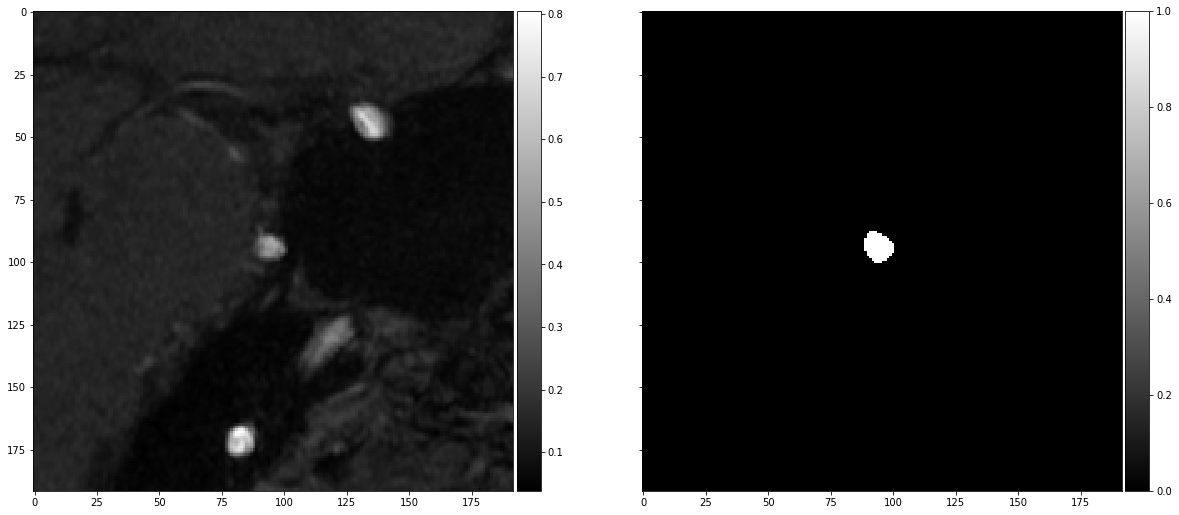

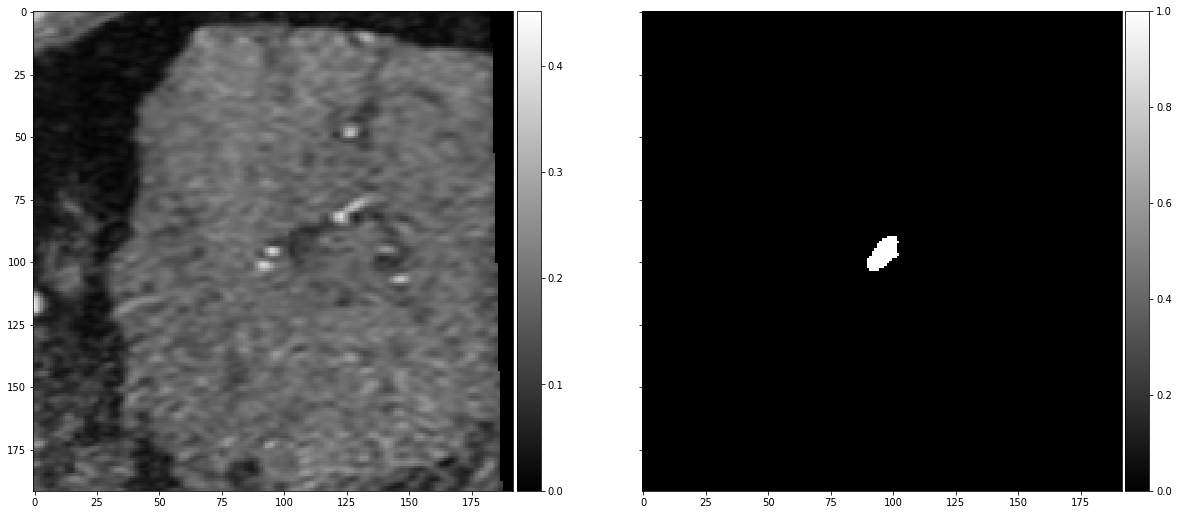

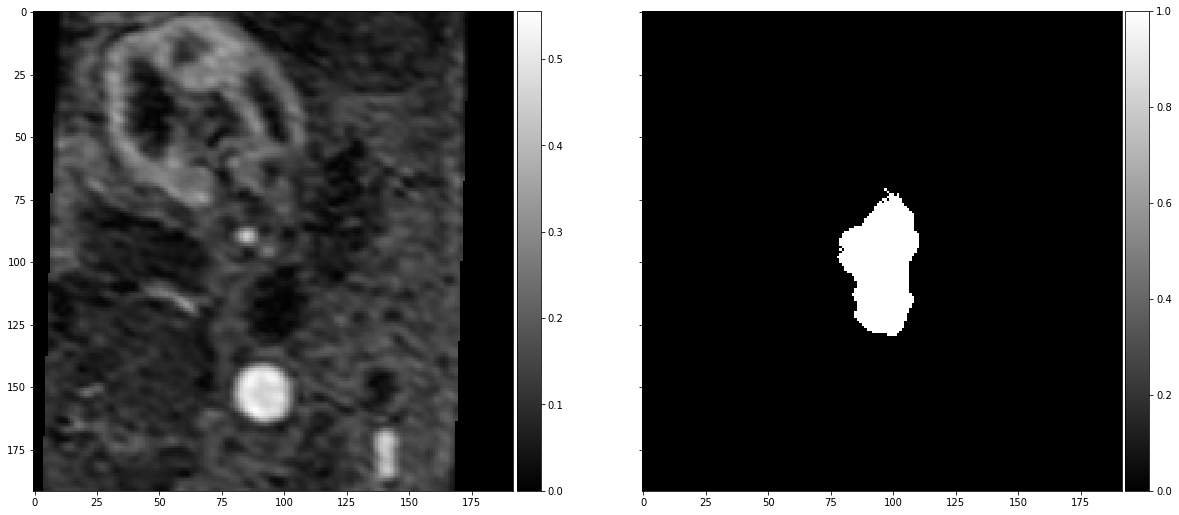

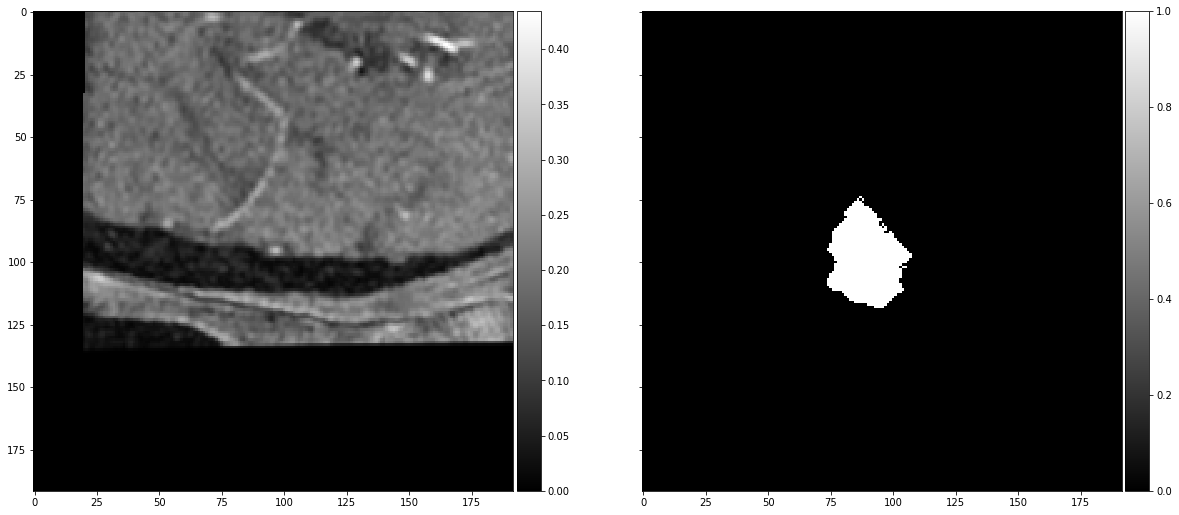

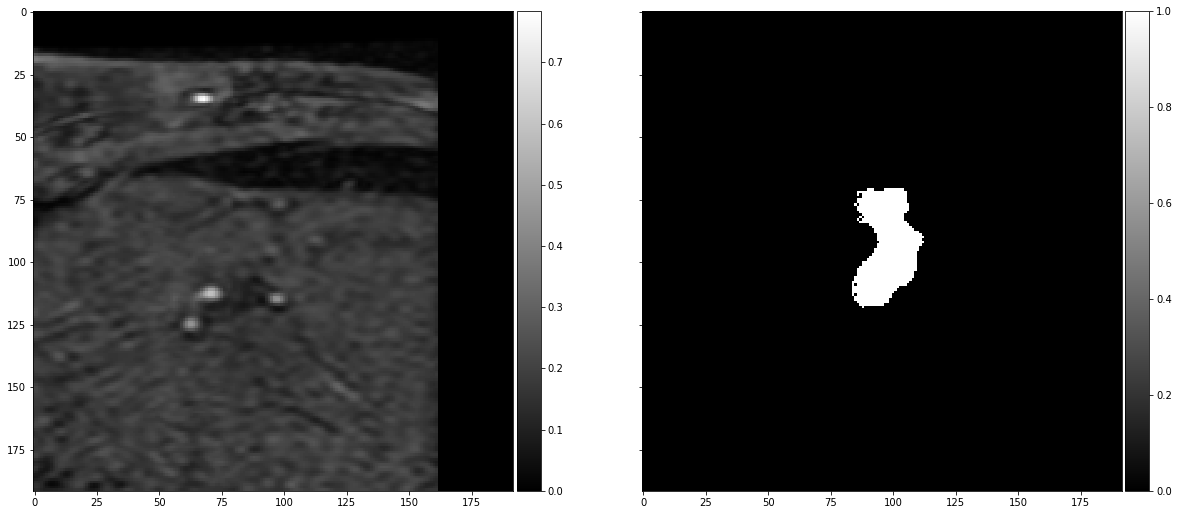

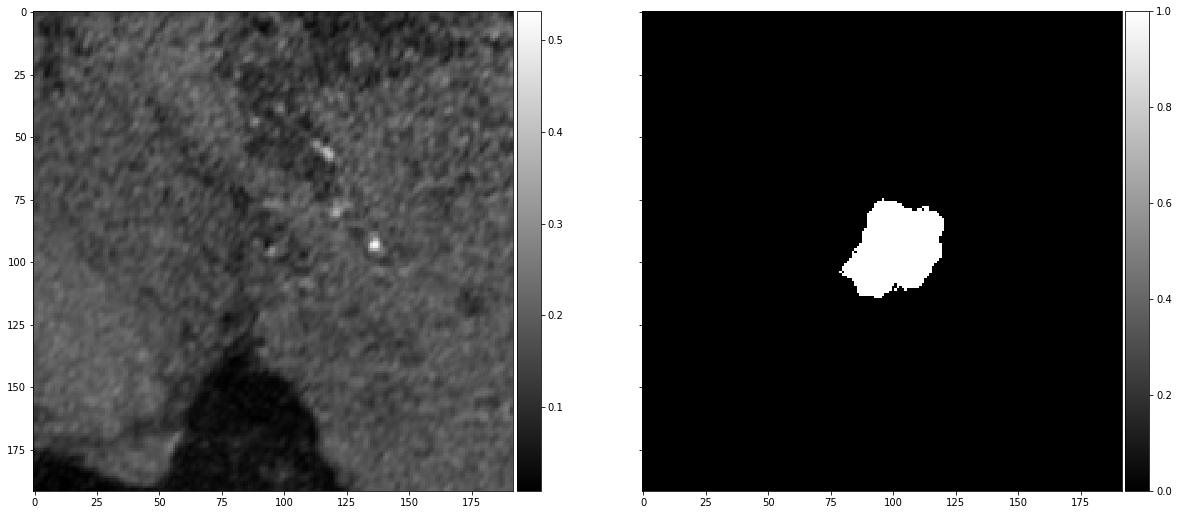

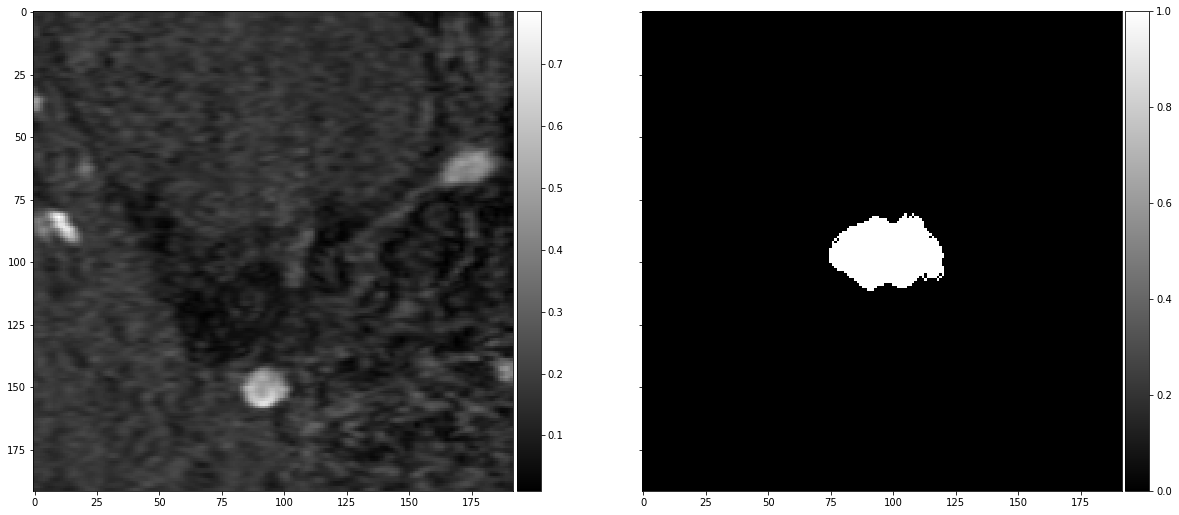

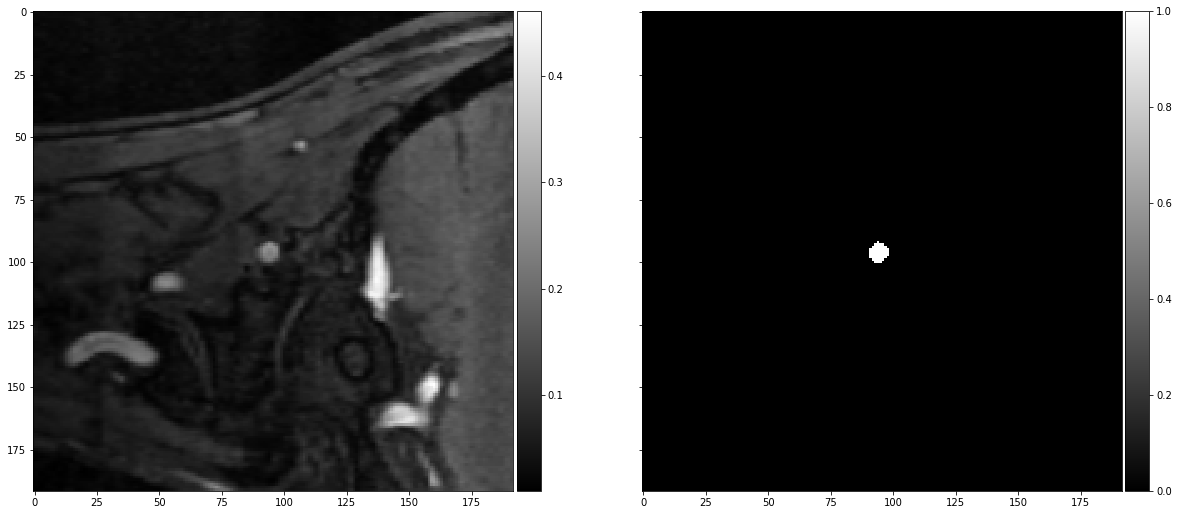

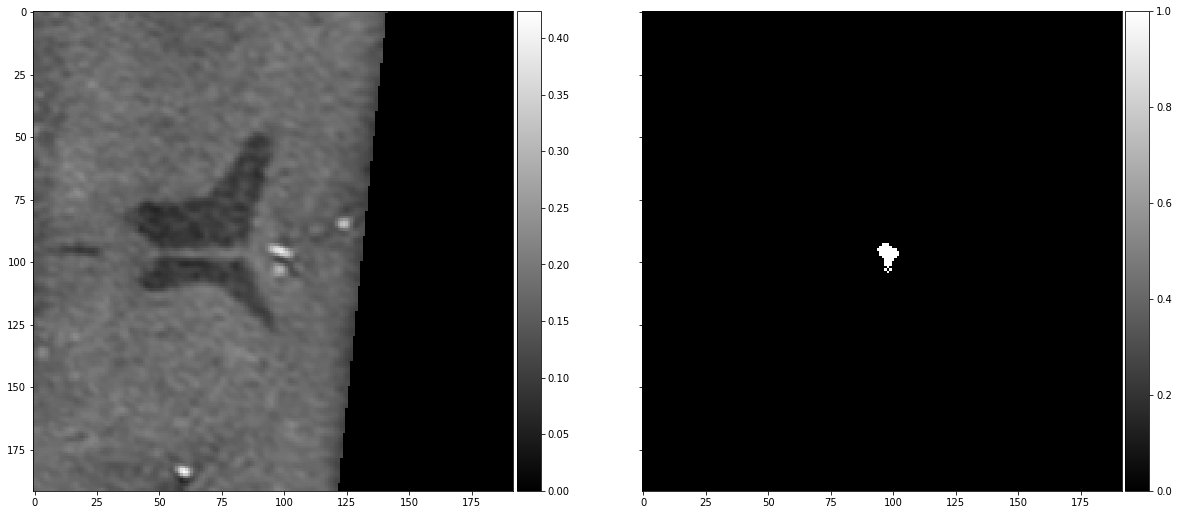

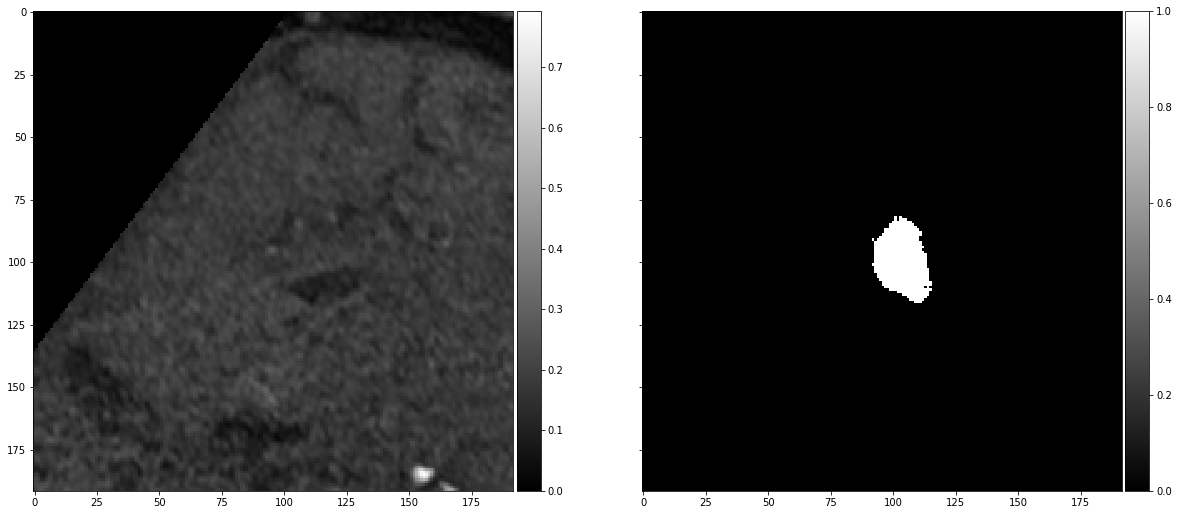

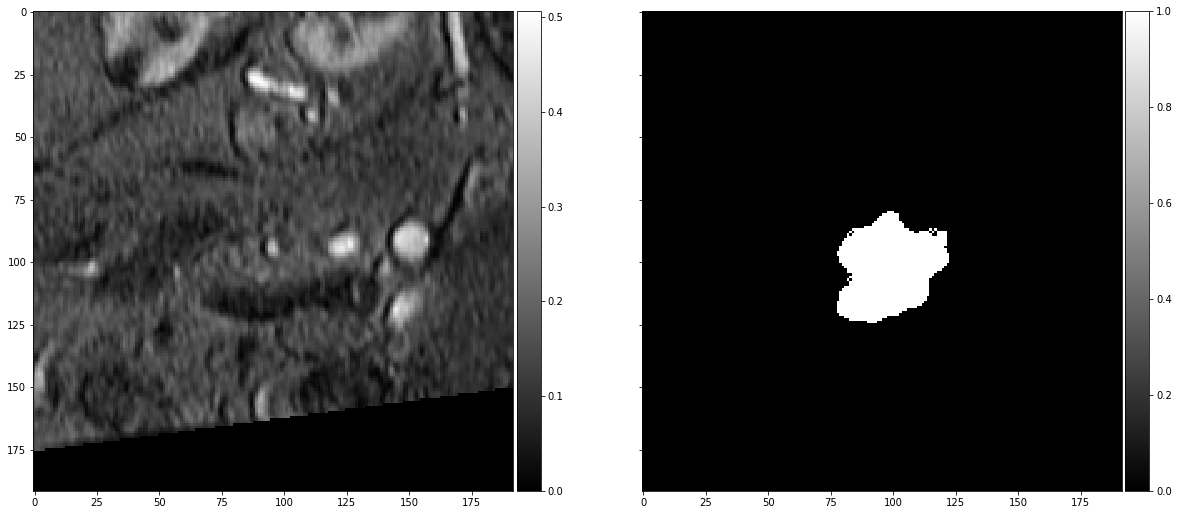

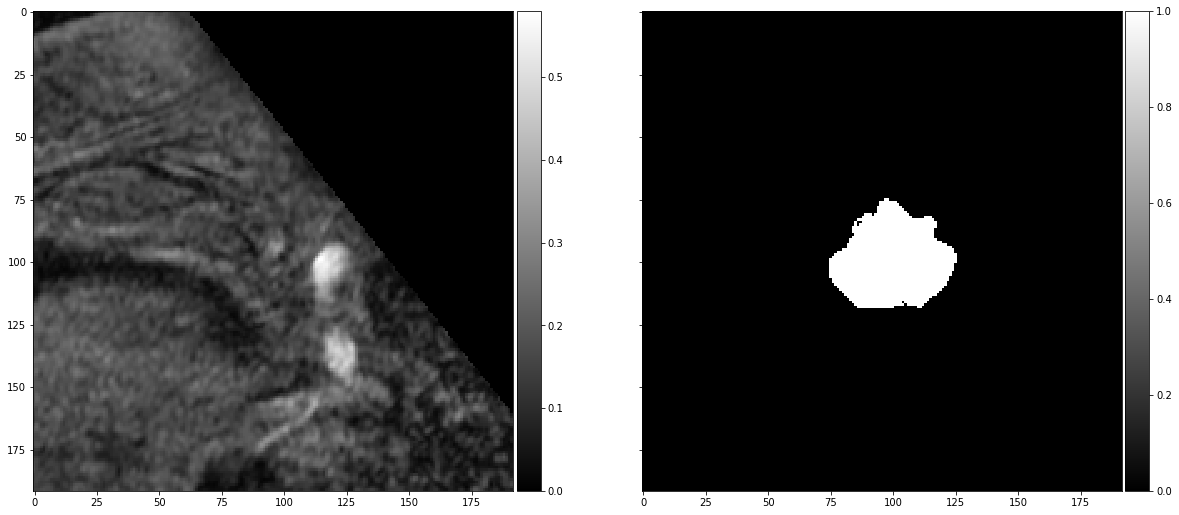

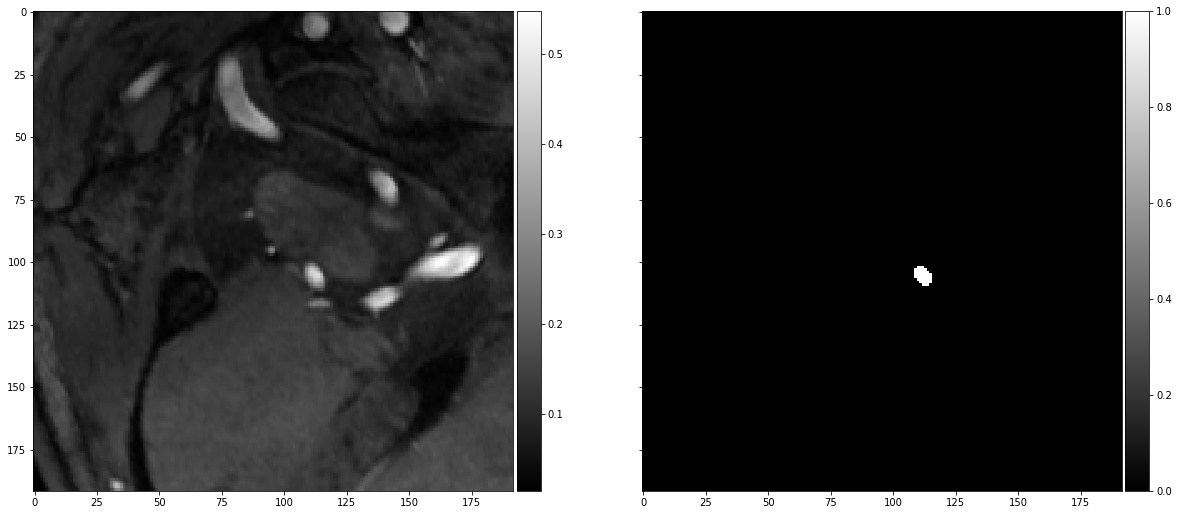

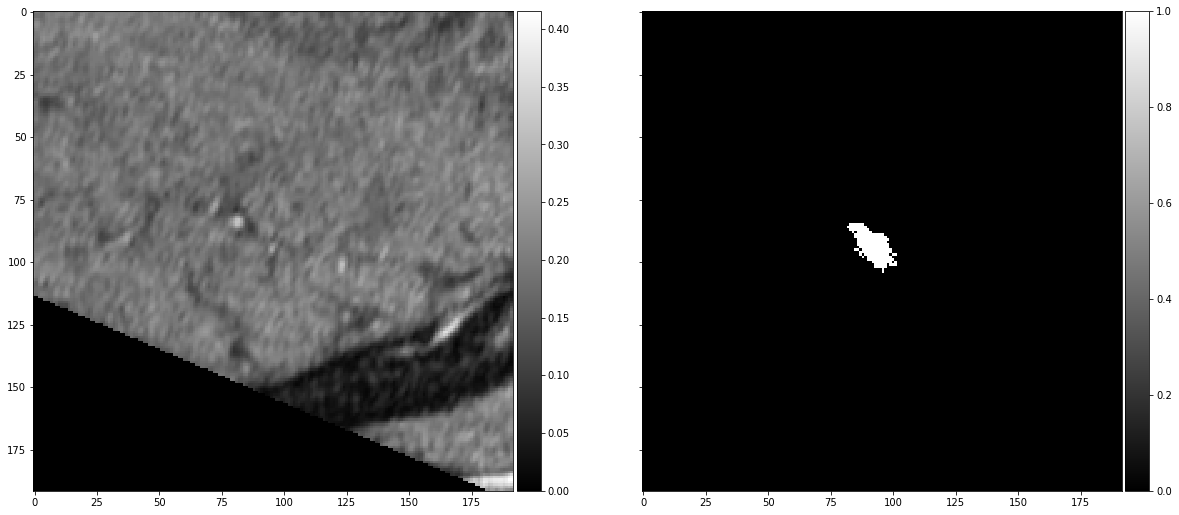

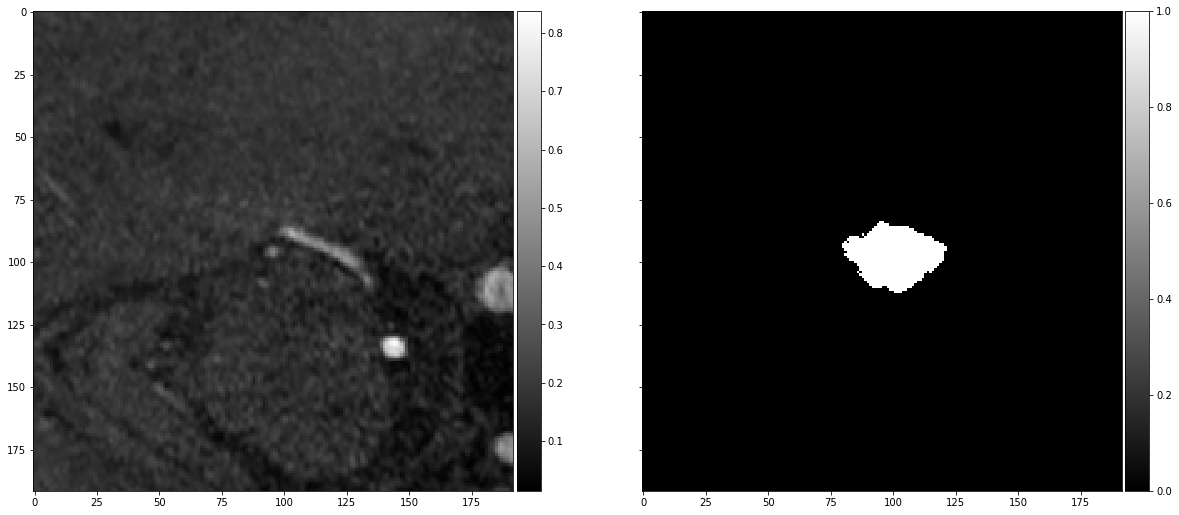

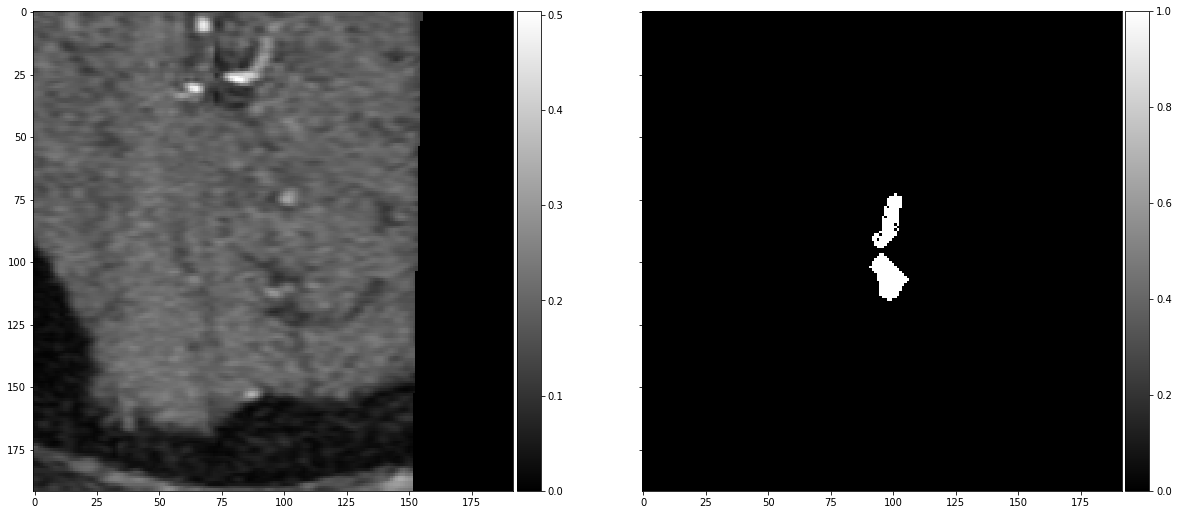

In [36]:
######################################################
# Plot
######################################################
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['figure.figsize'] = (20.0, 10.0)
def implot(mp,ax):
    im = ax.imshow(mp.astype(np.float32), cmap='gray')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
 
for i in range(20):
    j = np.random.randint(N)
    im = f_test.root.X[j,:,:,0].astype(float)
    seg = segs[j,:,:].astype(float)
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    implot(im,ax1)
    implot(seg,ax2)
    plt.tight_layout
    plt.show()

In [8]:
#mr data
CODE ='OOF'
oof_test_mr = data_path+'test_192_mr_oof.hdf5'
oof_test_ct = data_path+'test_192_ct_oof.hdf5'

f_mr = tables.open_file(oof_test_mr)
f_ct = tables.open_file(oof_test_ct)



In [7]:
mu = 0.3
lamda = 1.5
alpha = 0.6
R = 40

X = f_ct.root.X
Y = f_ct.root.Y
print X.shape
print Y.shape
N,H,W,C = X.shape

segs = np.zeros((N,H,W))
conts = []
for i in range(N):
    if i%1000 == 0:
        print i
    img = X[i,:,:,0]
    seg,cont = DRLS(img,rad=R,alpha=alpha,lamda=lamda)
    segs[i] = seg
    conts.append(cont)

(31588, 192, 192, 1)
(31588, 192, 192, 1)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000


In [9]:
np.save('drls_segs_{}_ct.npy'.format(CODE),segs)
np.save('drls_conts_{}_ct.npy'.format(CODE),conts)

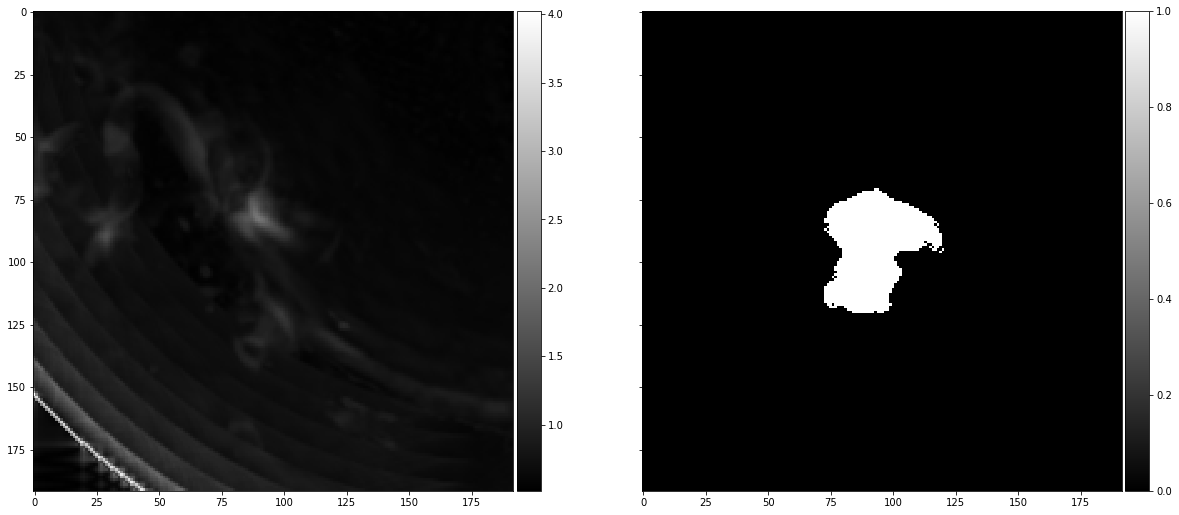

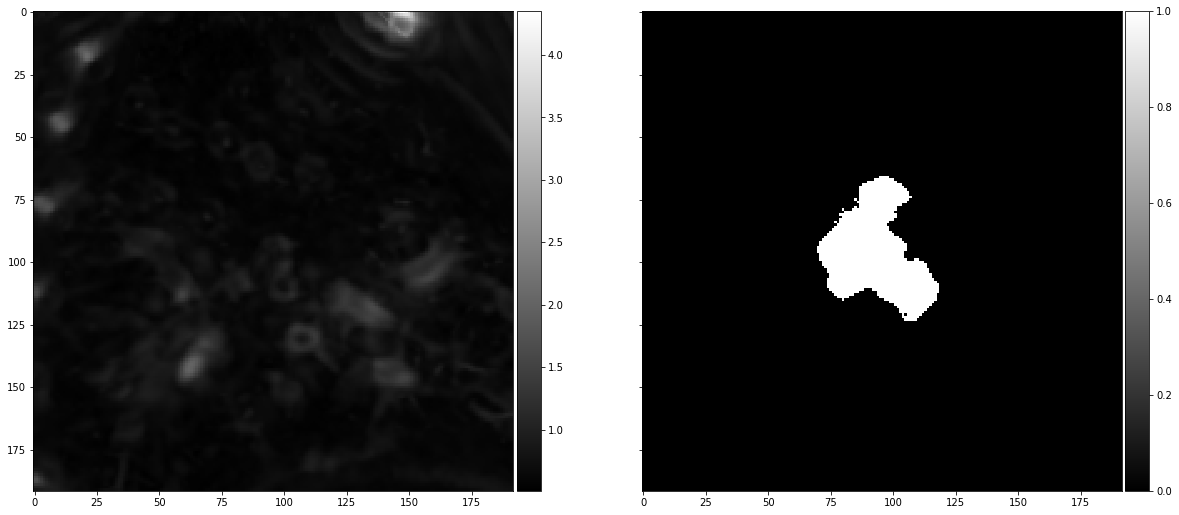

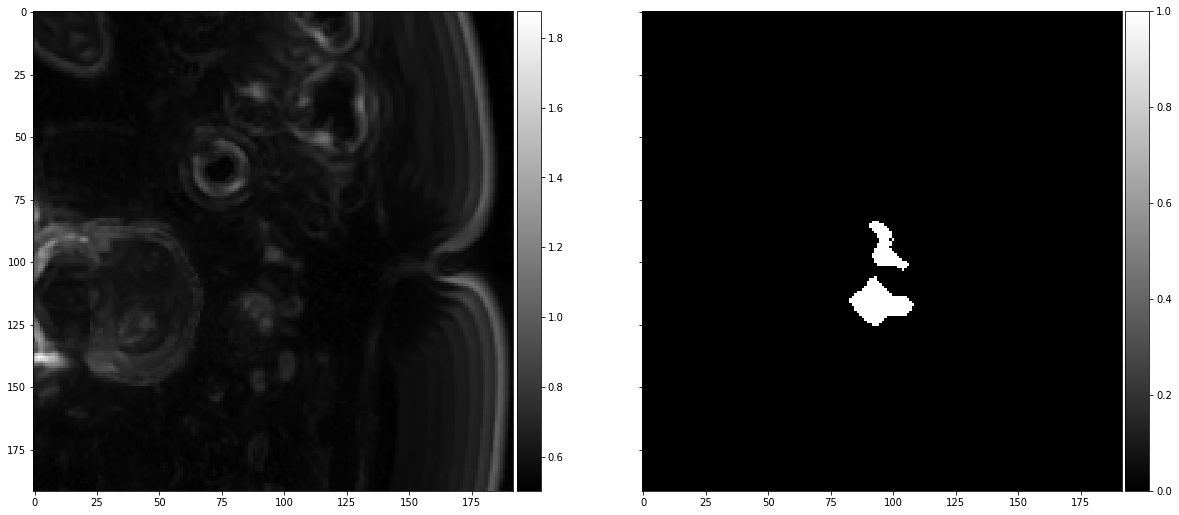

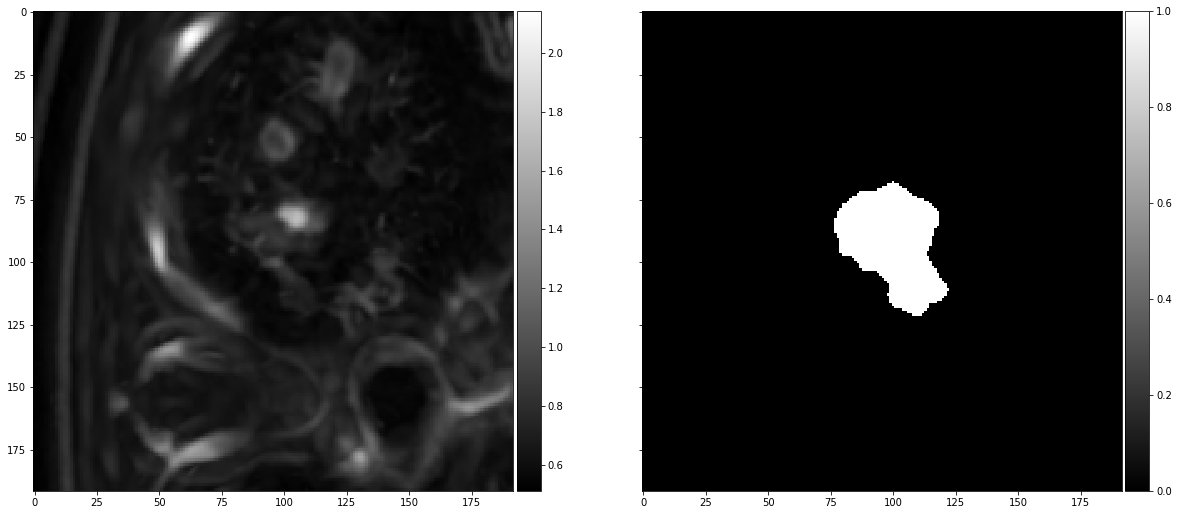

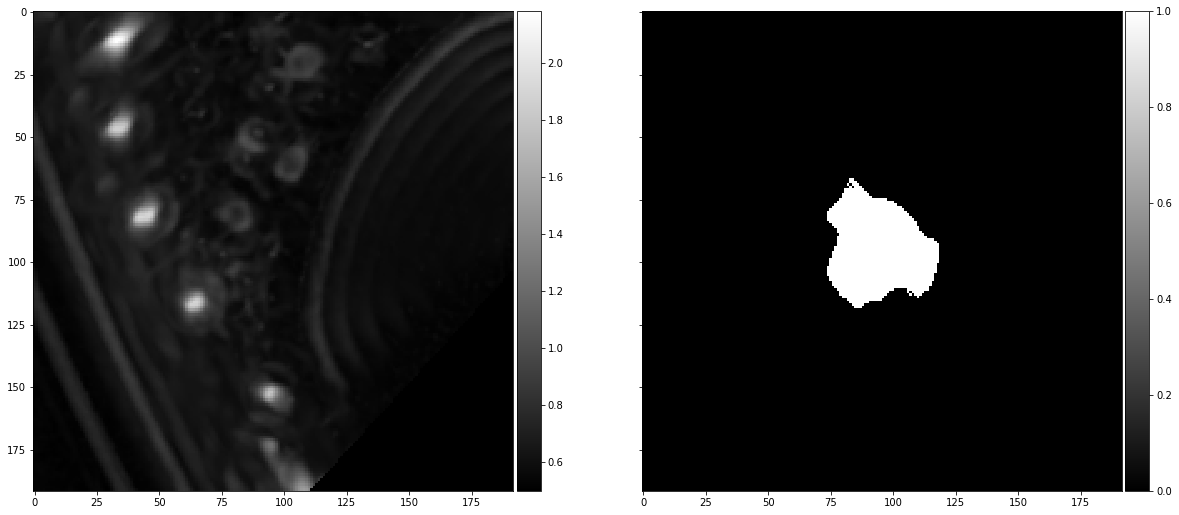

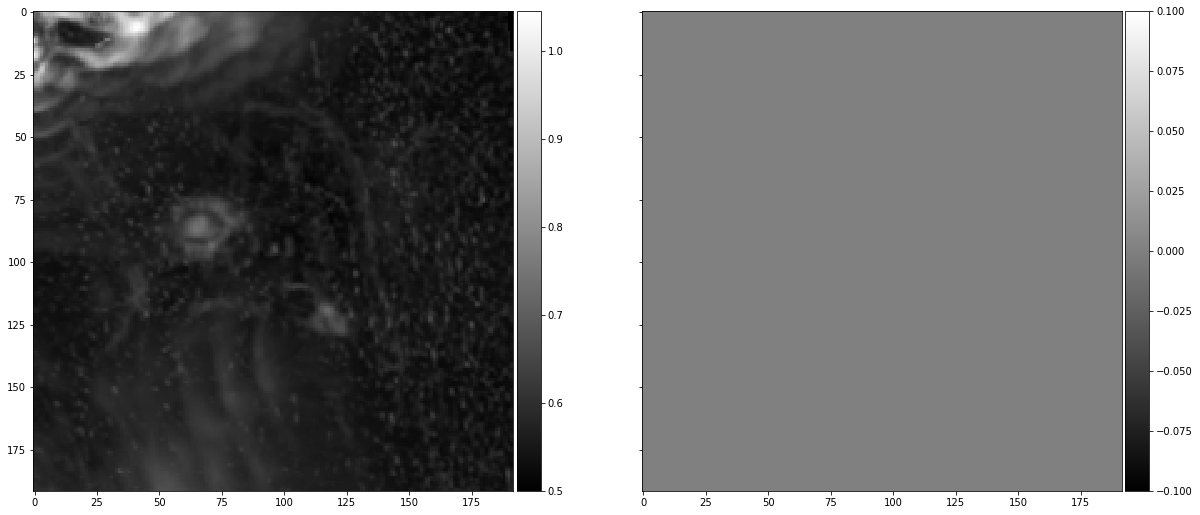

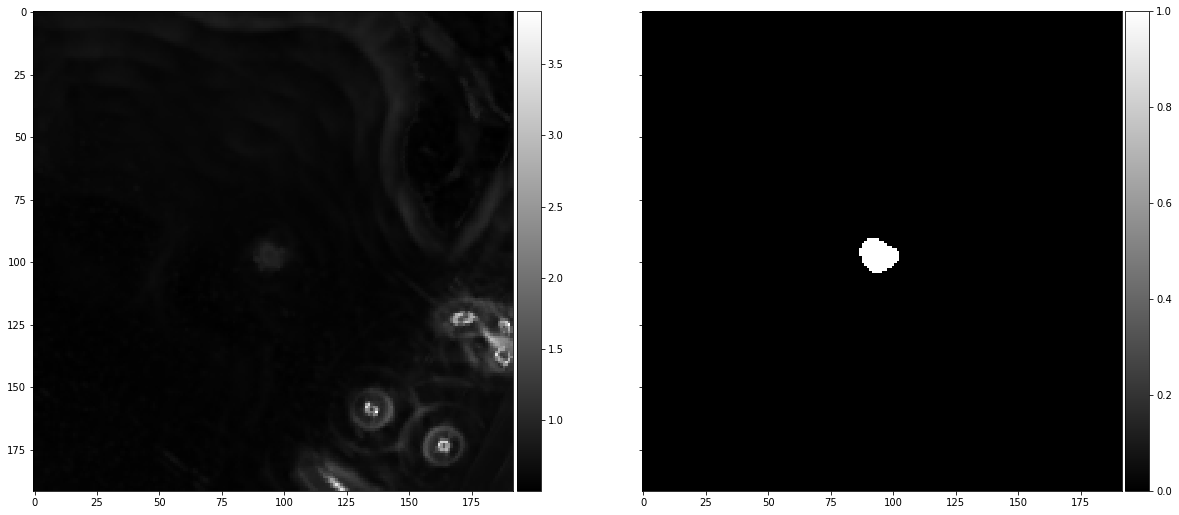

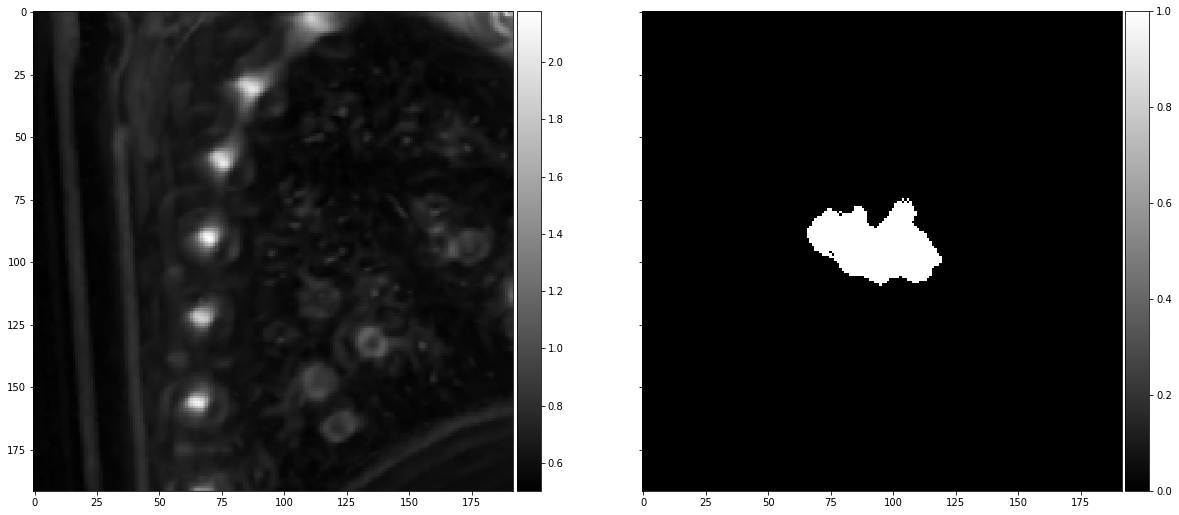

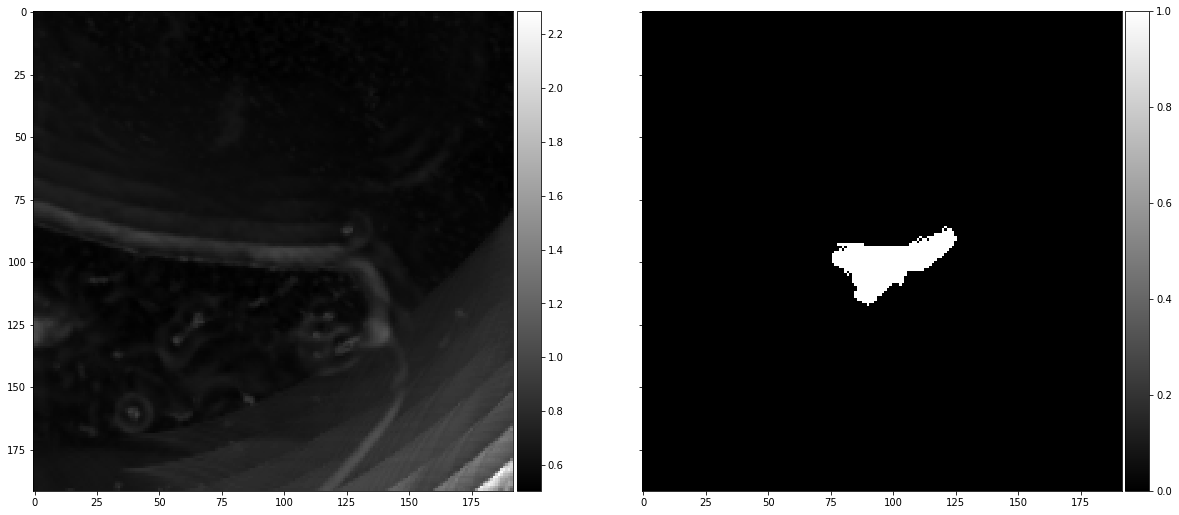

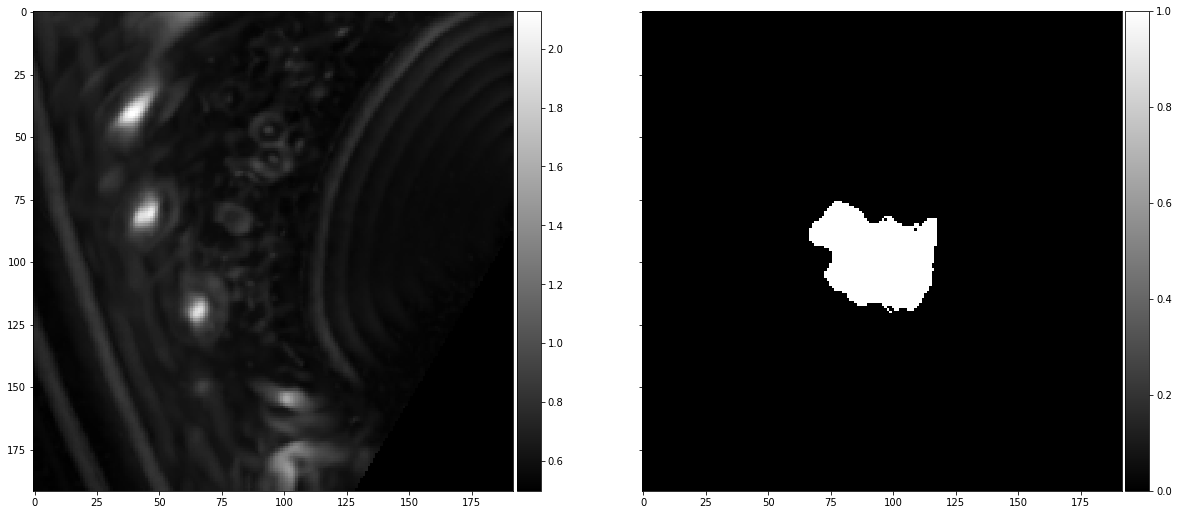

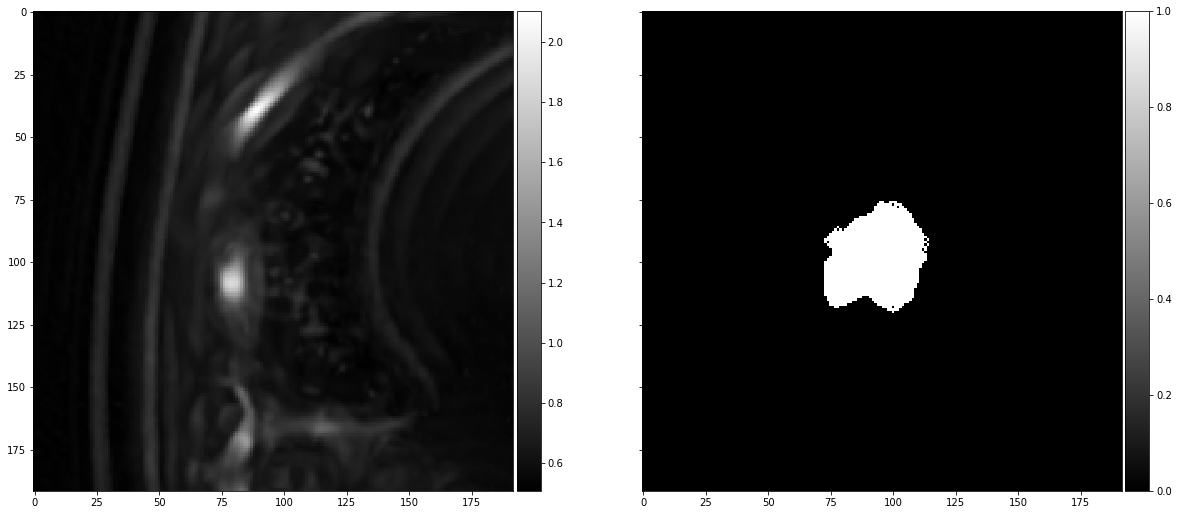

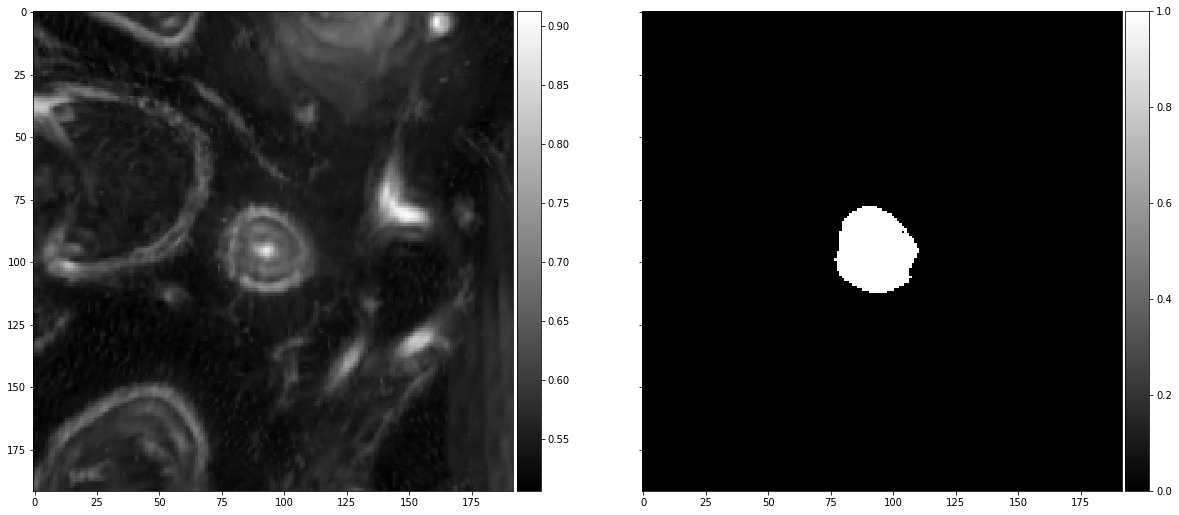

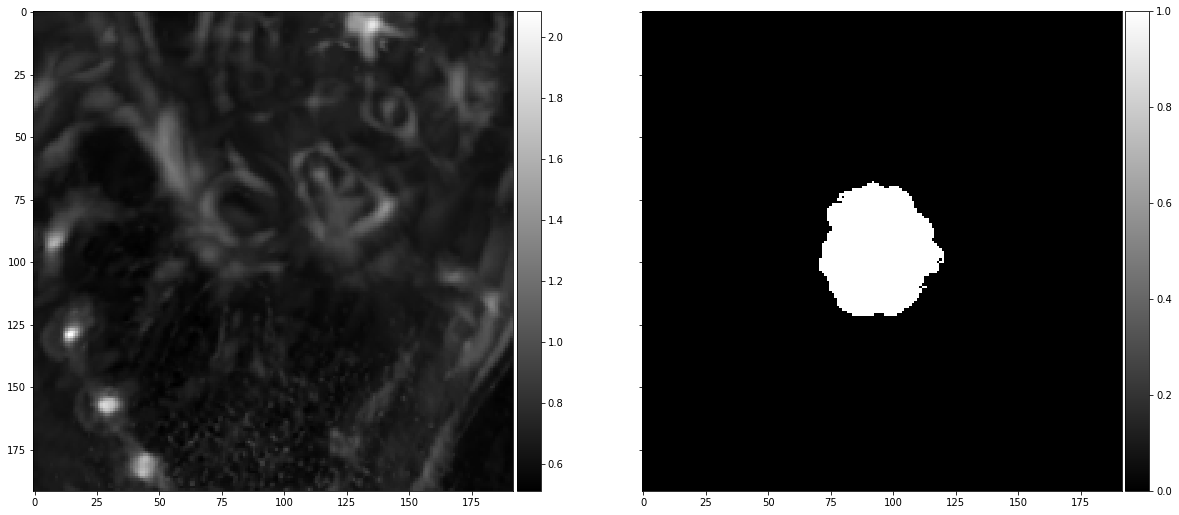

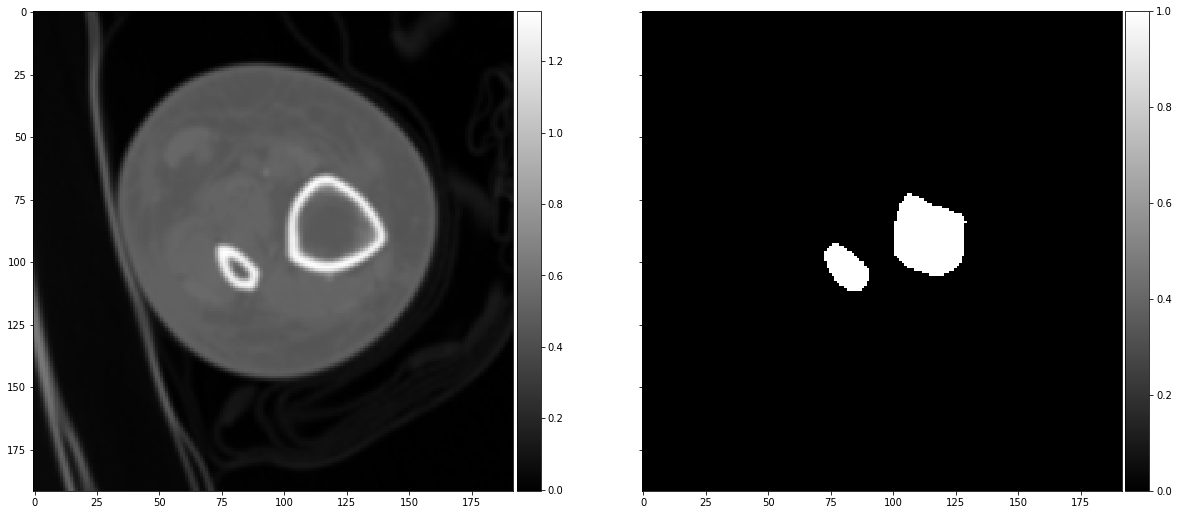

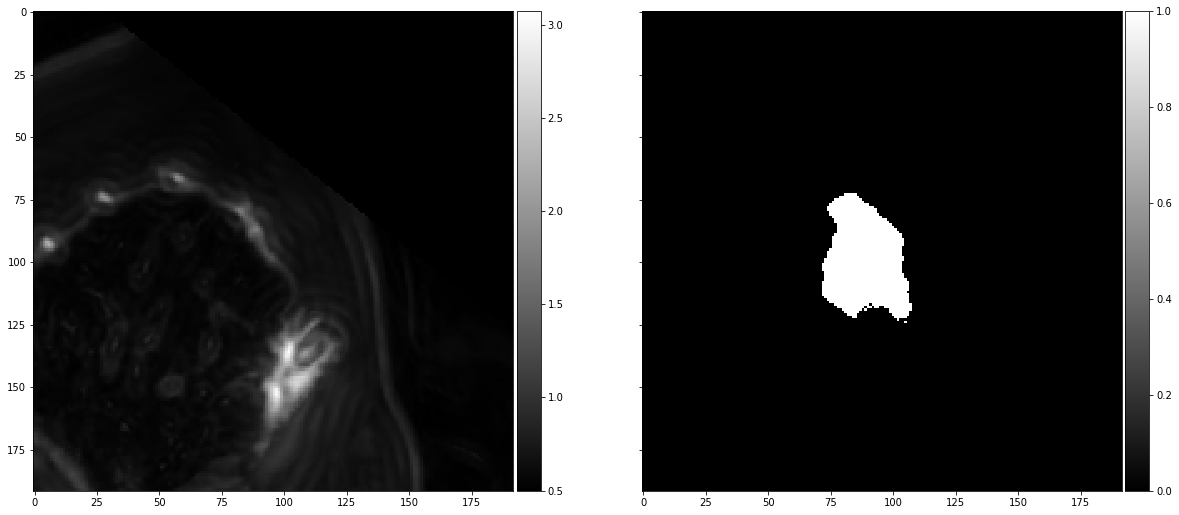

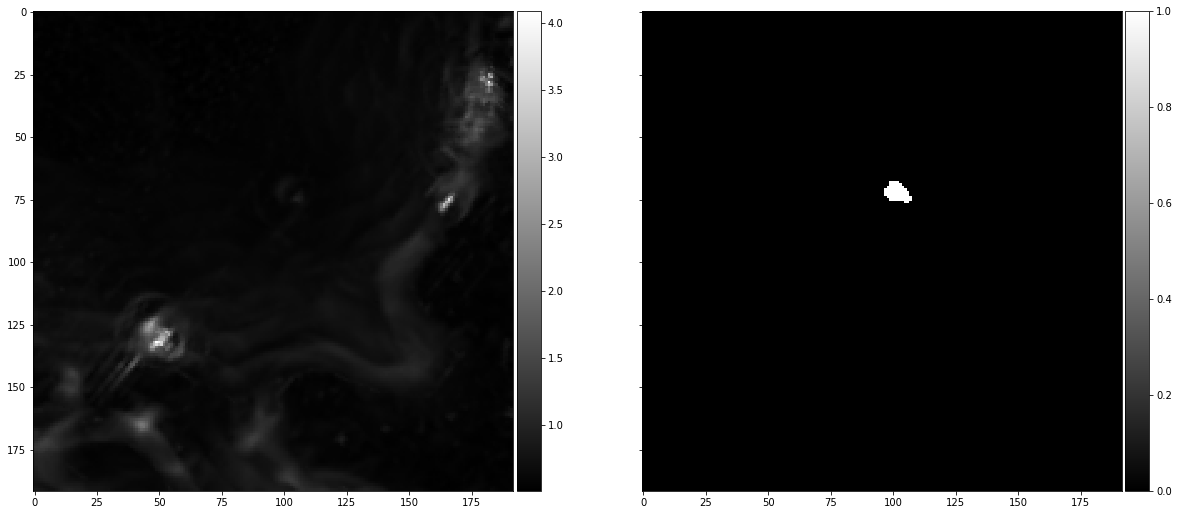

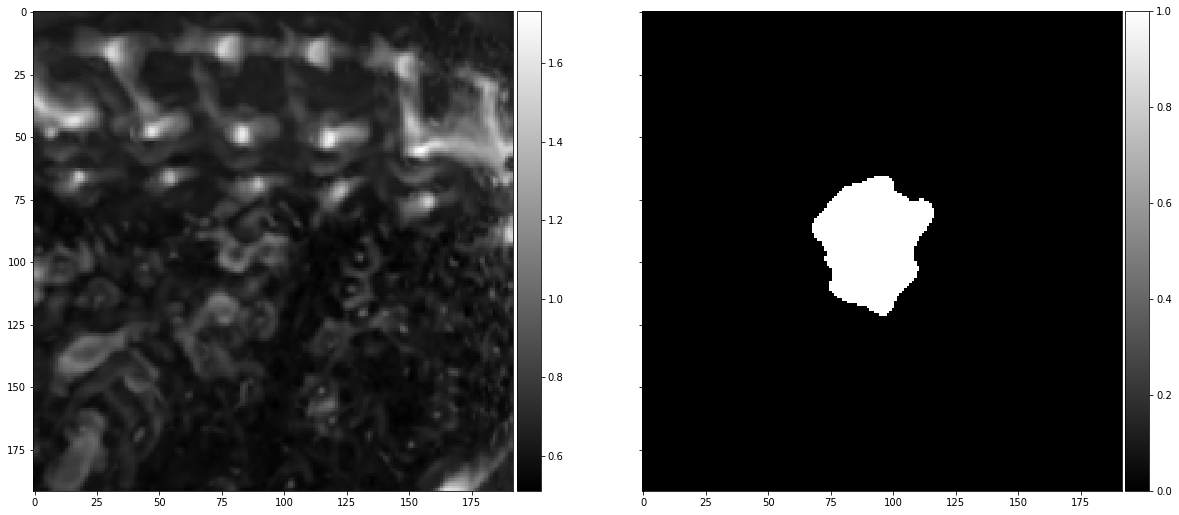

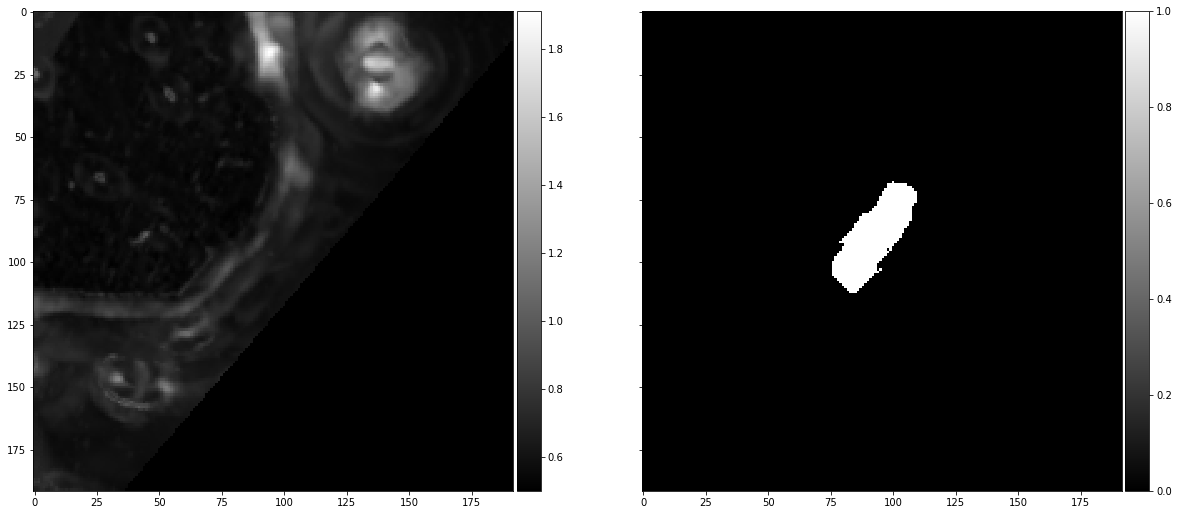

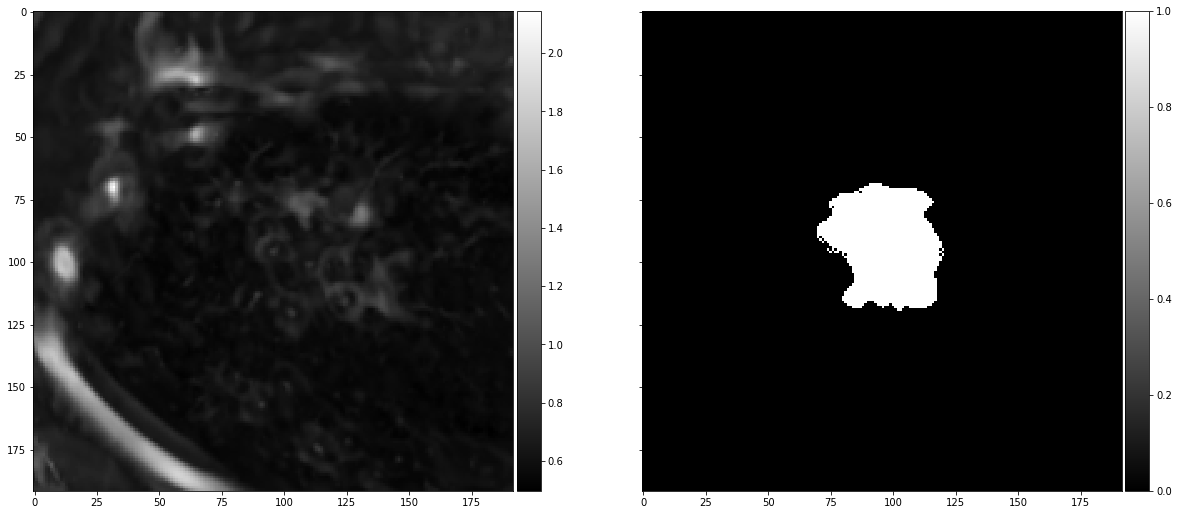

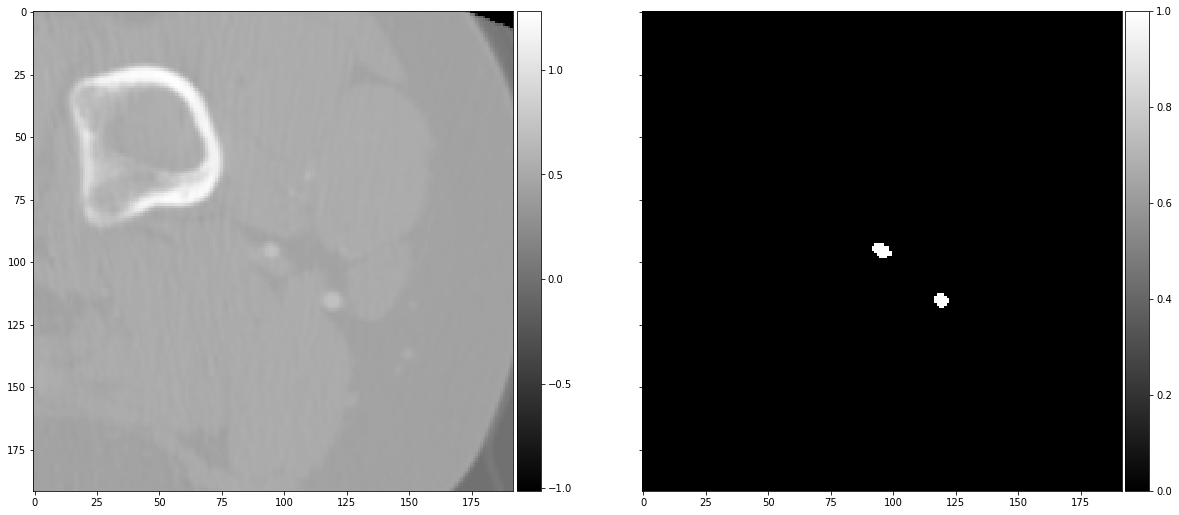

In [10]:
######################################################
# Plot
######################################################
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['figure.figsize'] = (20.0, 10.0)
def implot(mp,ax):
    im = ax.imshow(mp.astype(np.float32), cmap='gray')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
 
for i in range(20):
    j = np.random.randint(N)
    im = X[j,:,:,0].astype(float)
    seg,conts = DRLS(im,rad=R,alpha=alpha,lamda=lamda)
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    implot(im,ax1)
    implot(seg,ax2)
    plt.tight_layout
    plt.show()

In [6]:
mu = 0.3
lamda = 1.5
alpha = 0.5
R = 40

X = f_mr.root.X
Y = f_mr.root.Y
print X.shape
print Y.shape
N,H,W,C = X.shape

segs = np.zeros((N,H,W))
conts = []
for i in range(N):
    if i%1000 == 0:
        print i
    img = X[i,:,:,0]
    seg,cont = DRLS(img,rad=R,alpha=alpha,lamda=lamda)
    segs[i] = seg
    conts.append(cont)

NameError: name 'f_mr' is not defined

In [14]:
np.save('drls_segs_{}_mr.npy'.format(CODE),segs)
np.save('drls_conts_{}_mr.npy'.format(CODE),conts)

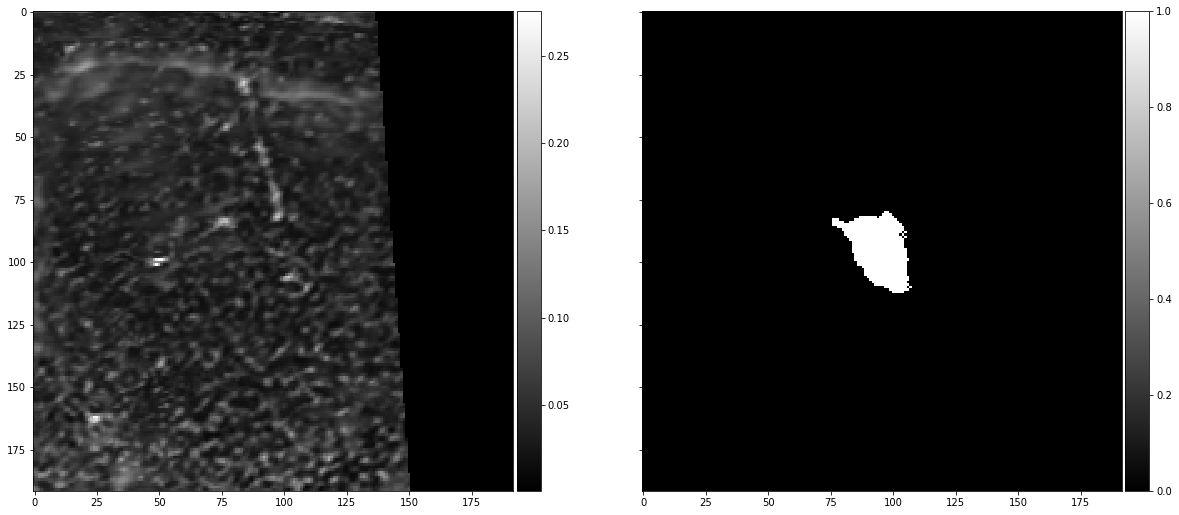

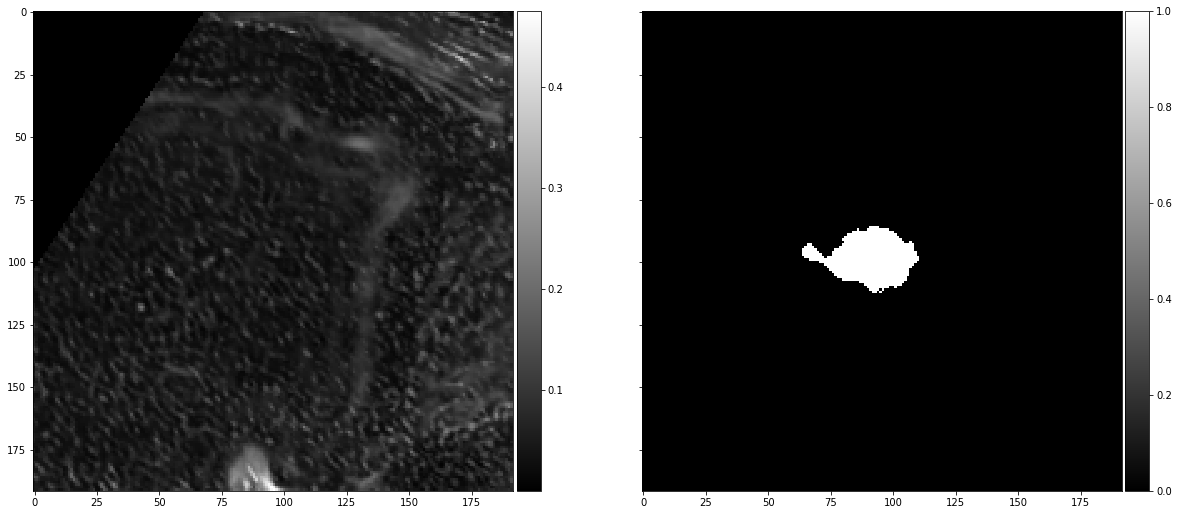

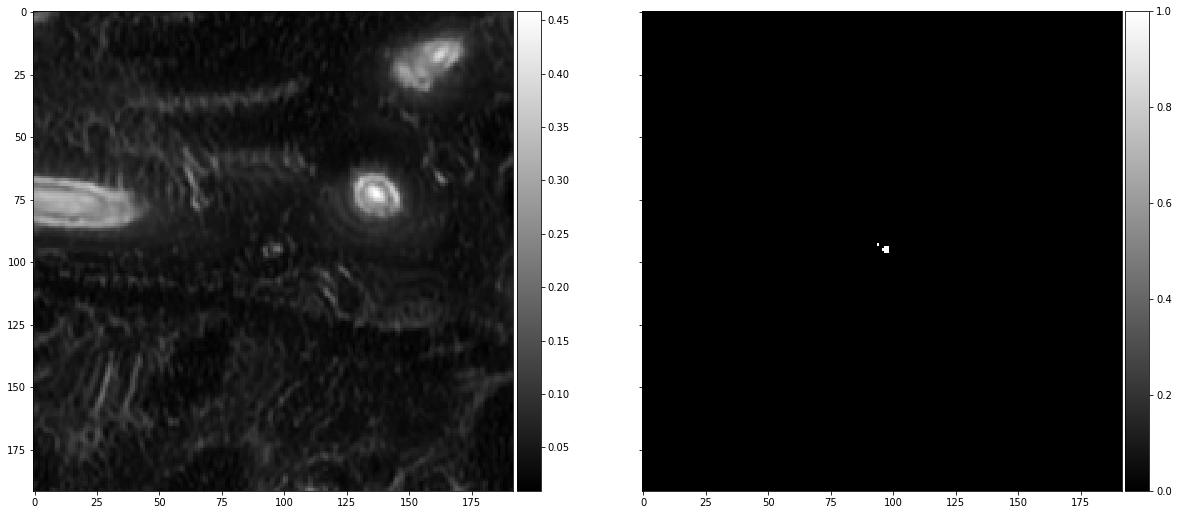

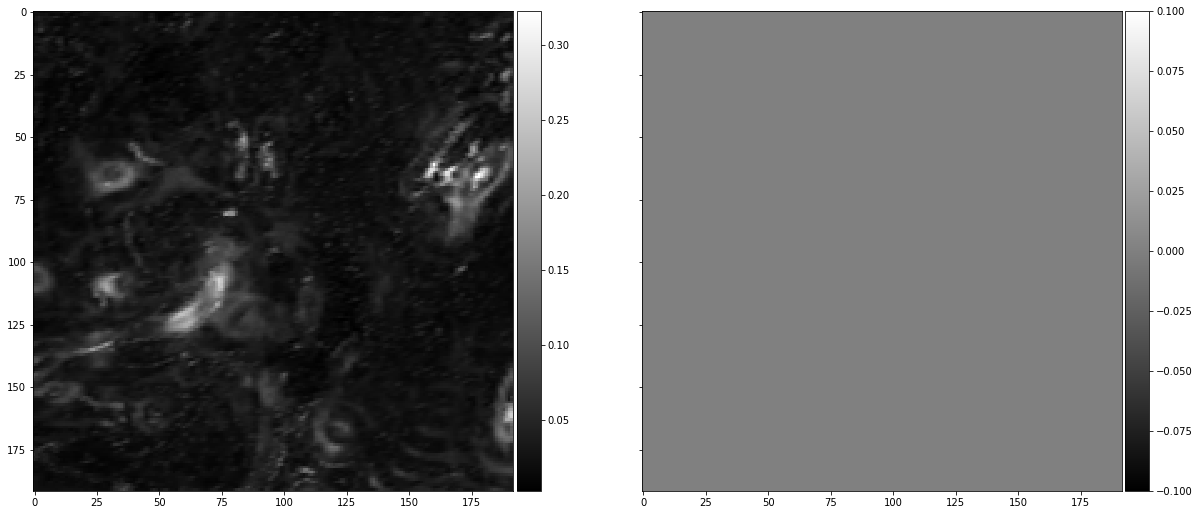

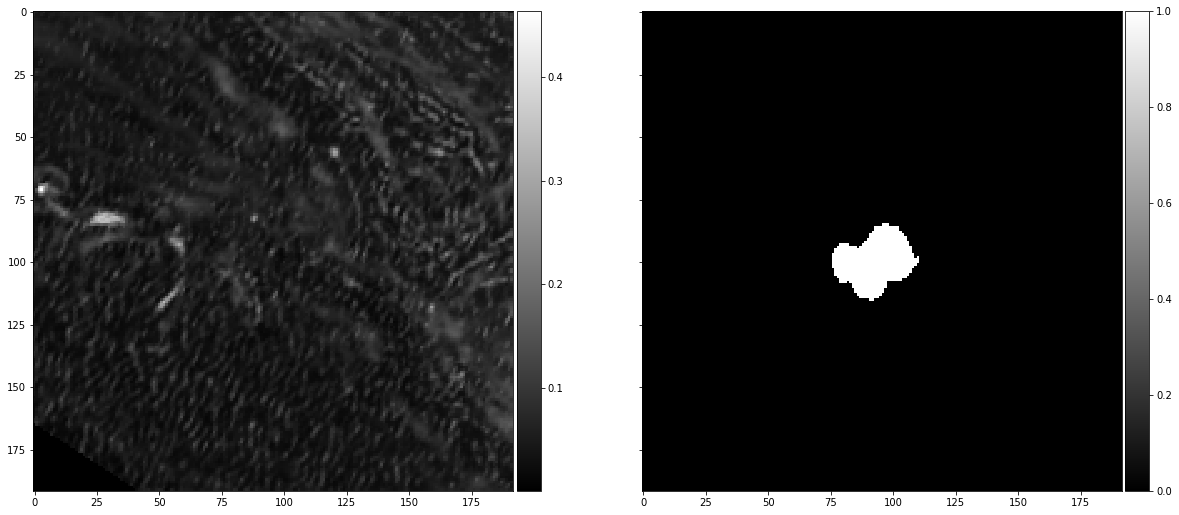

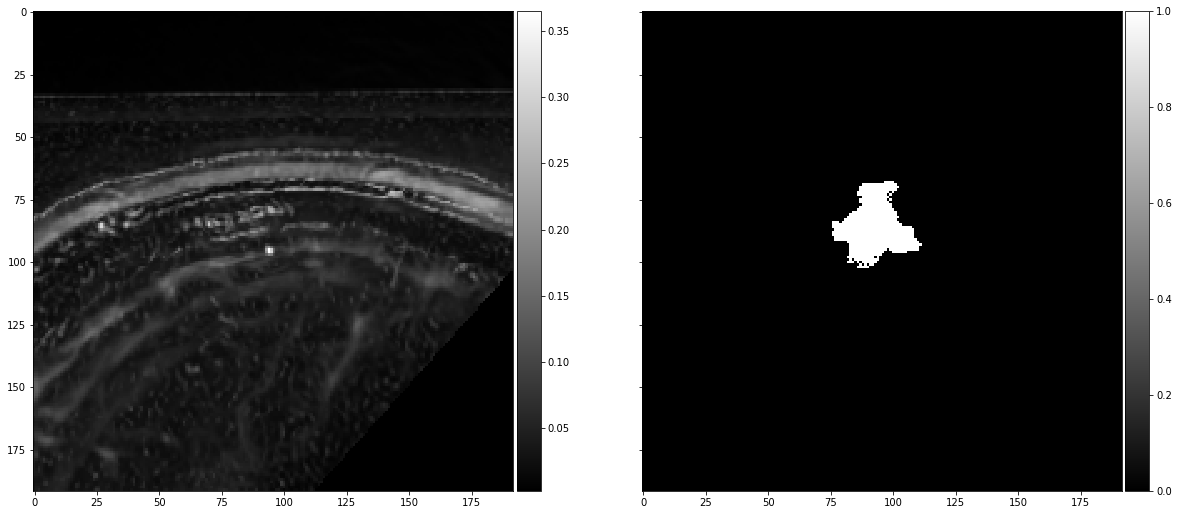

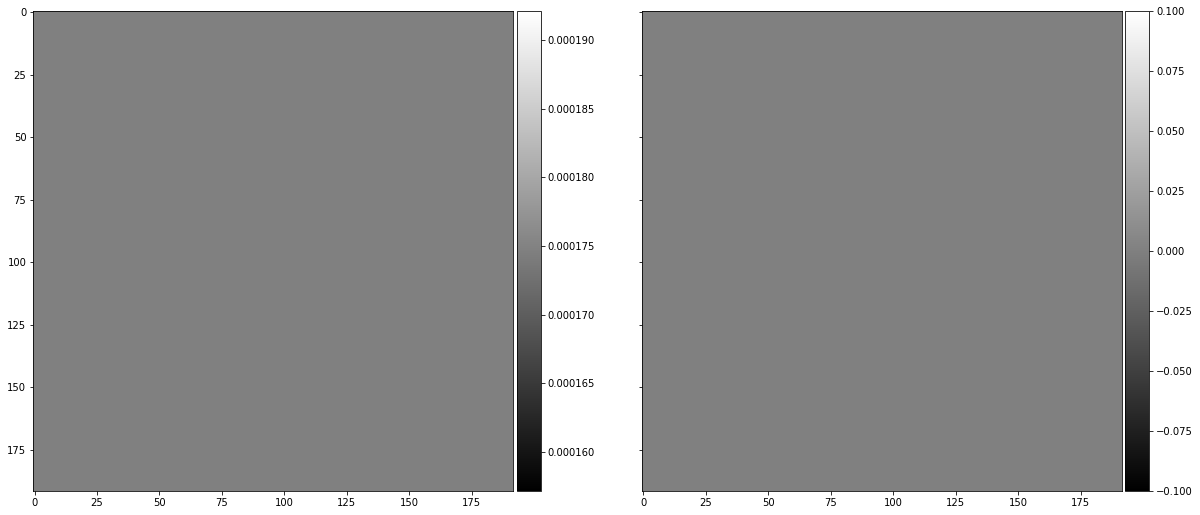

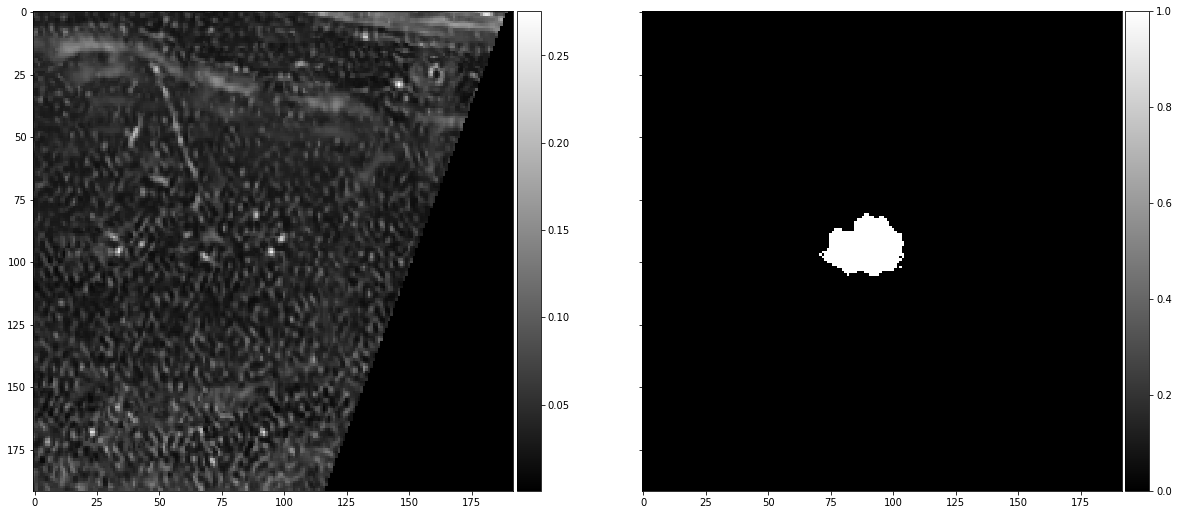

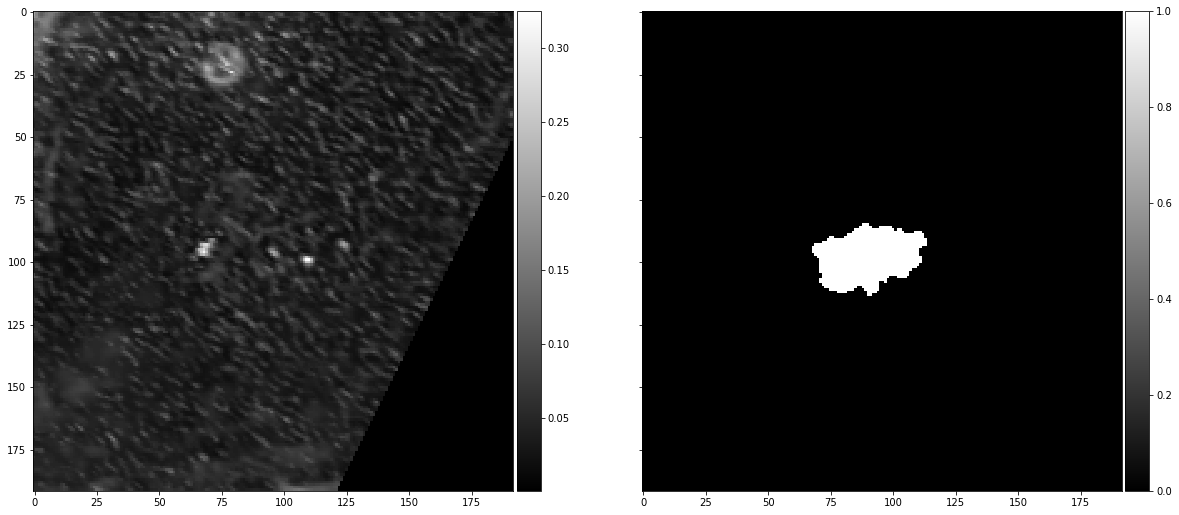

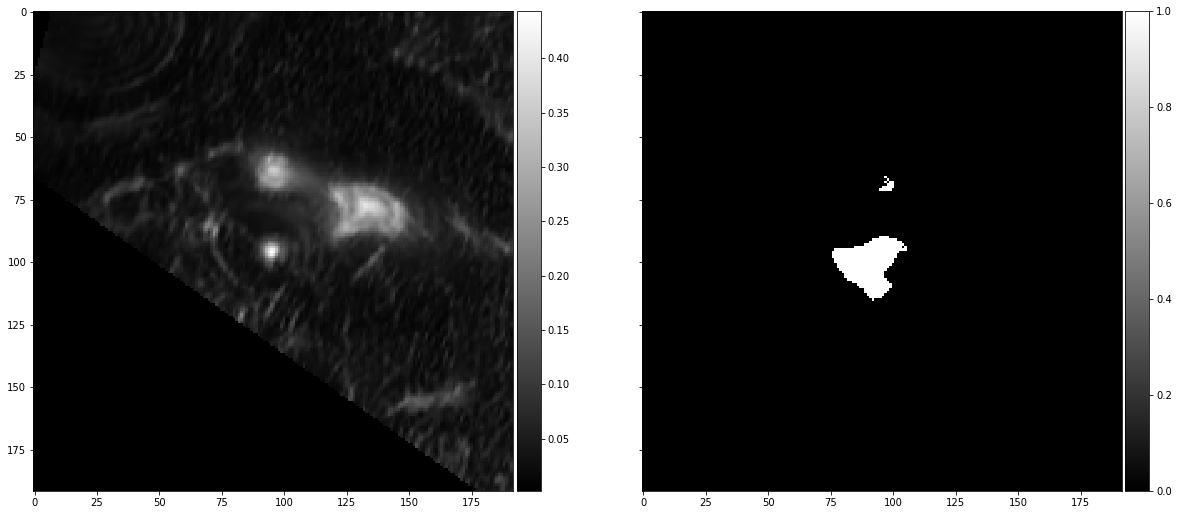

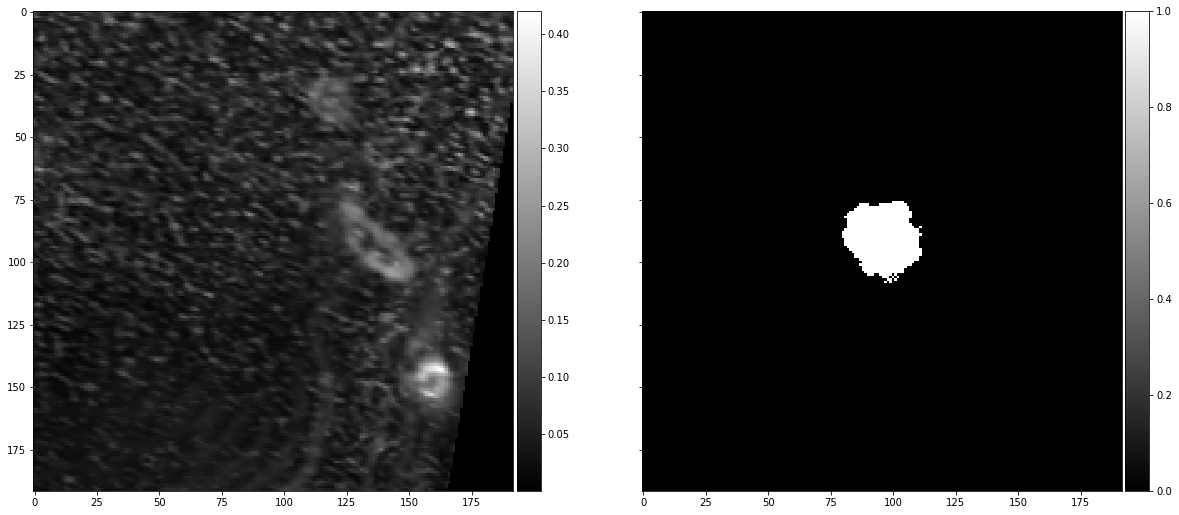

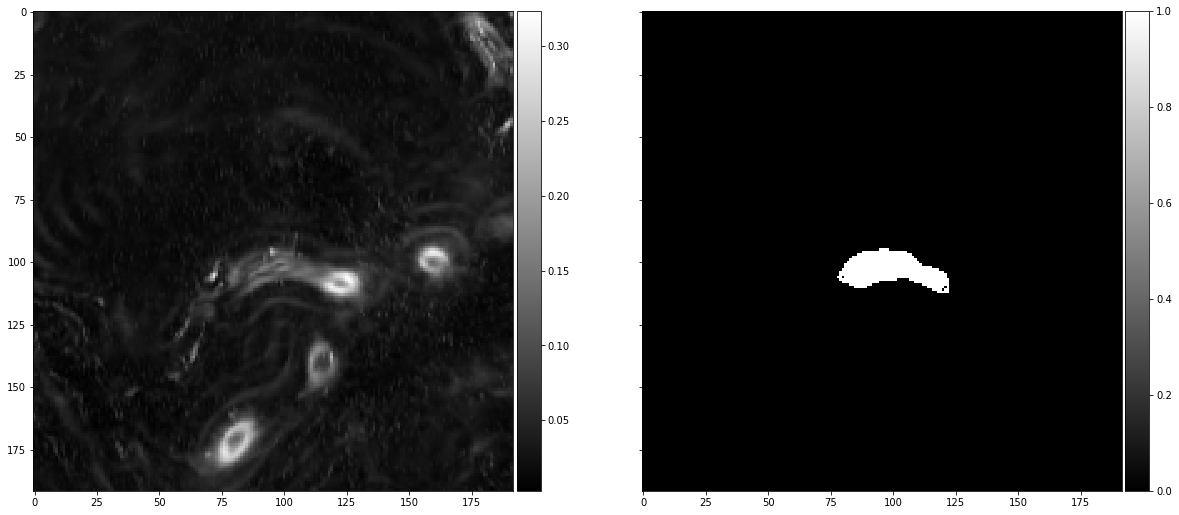

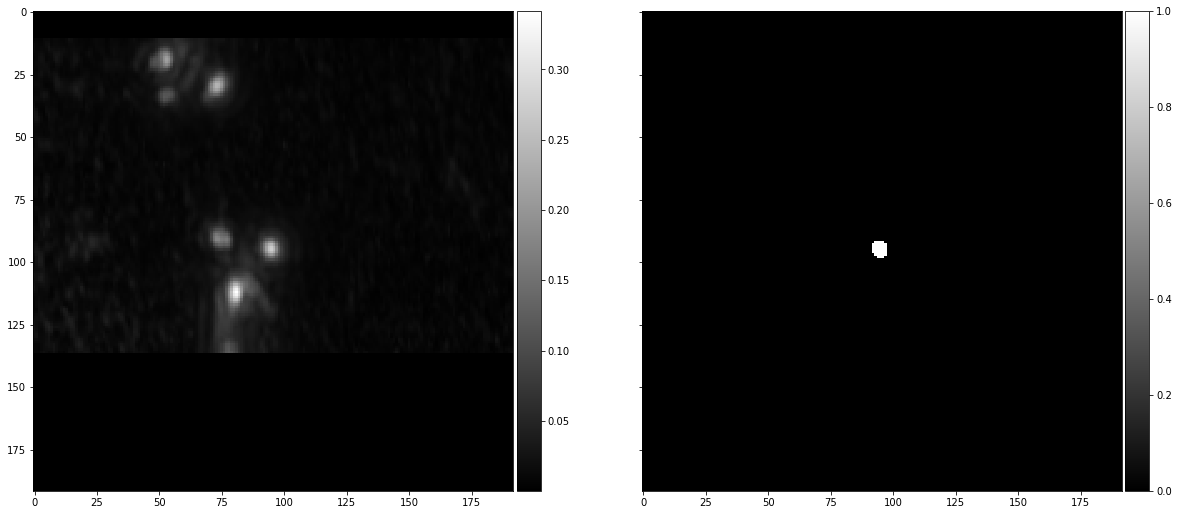

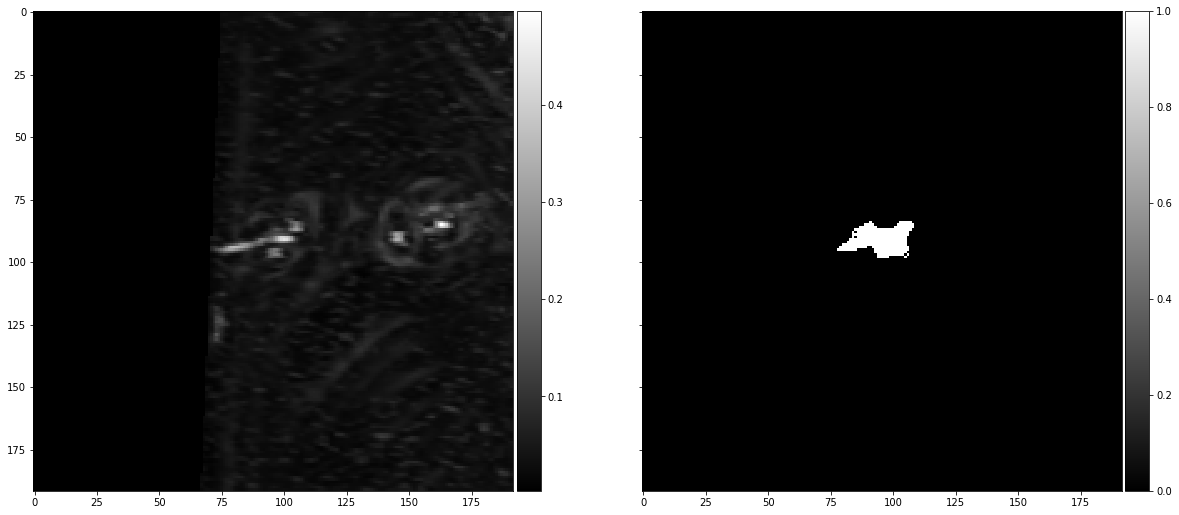

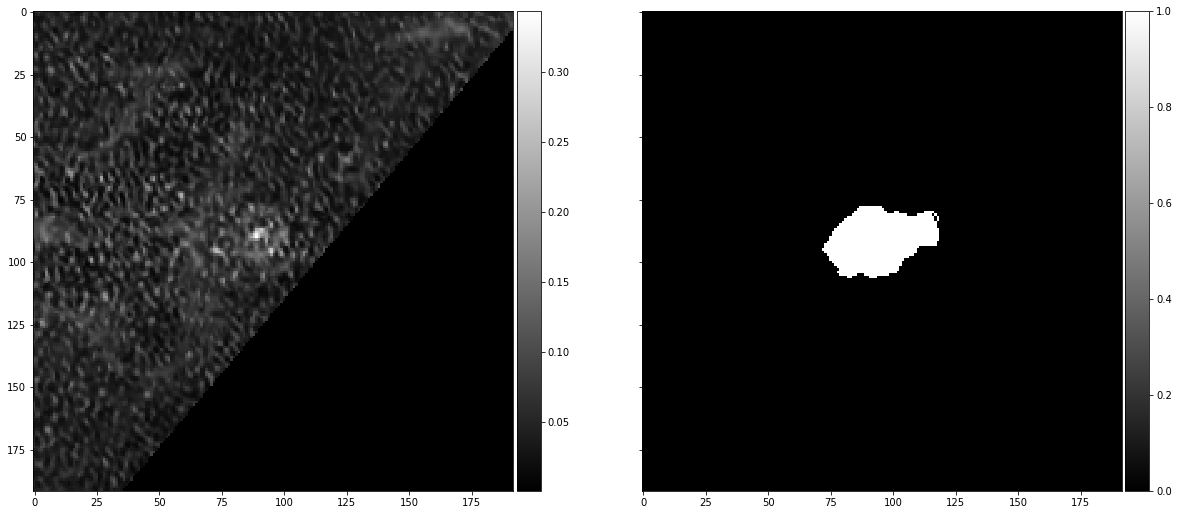

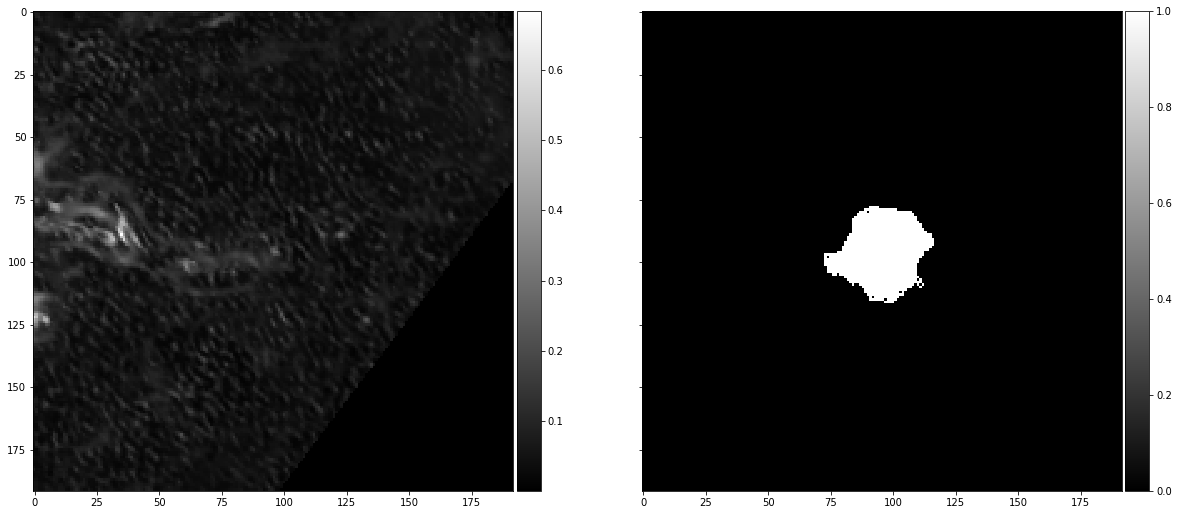

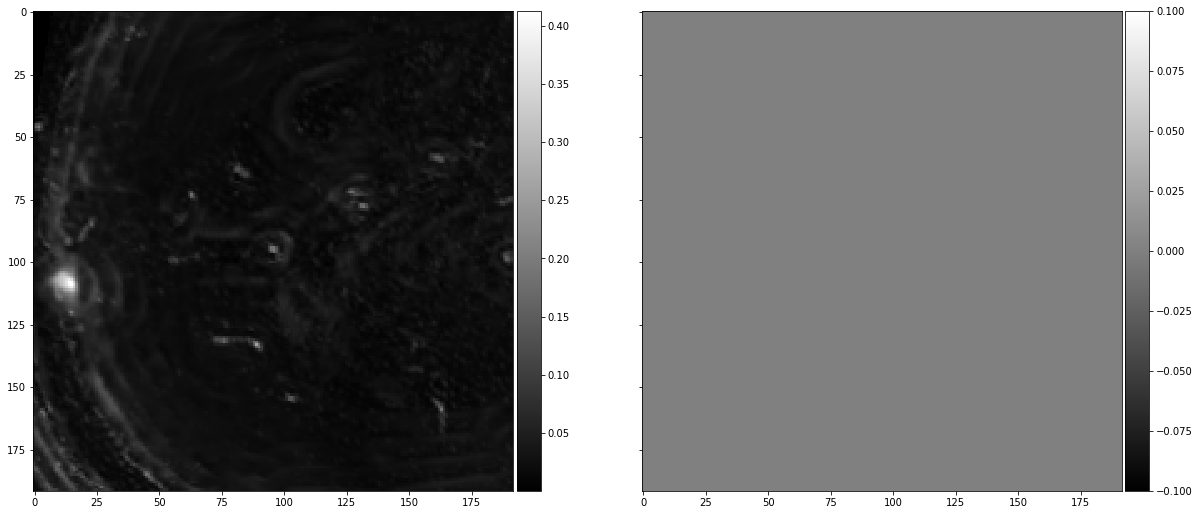

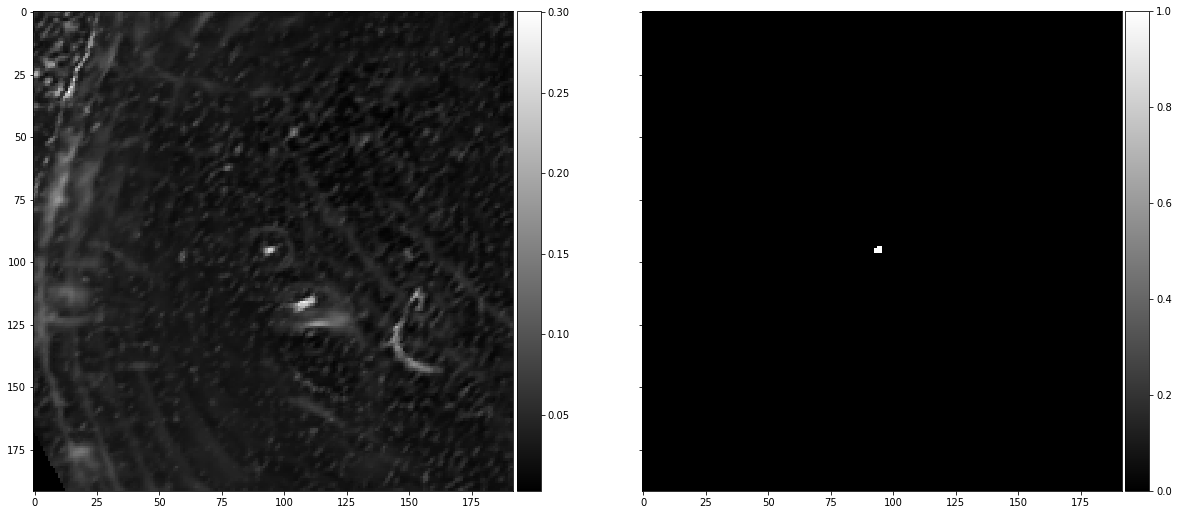

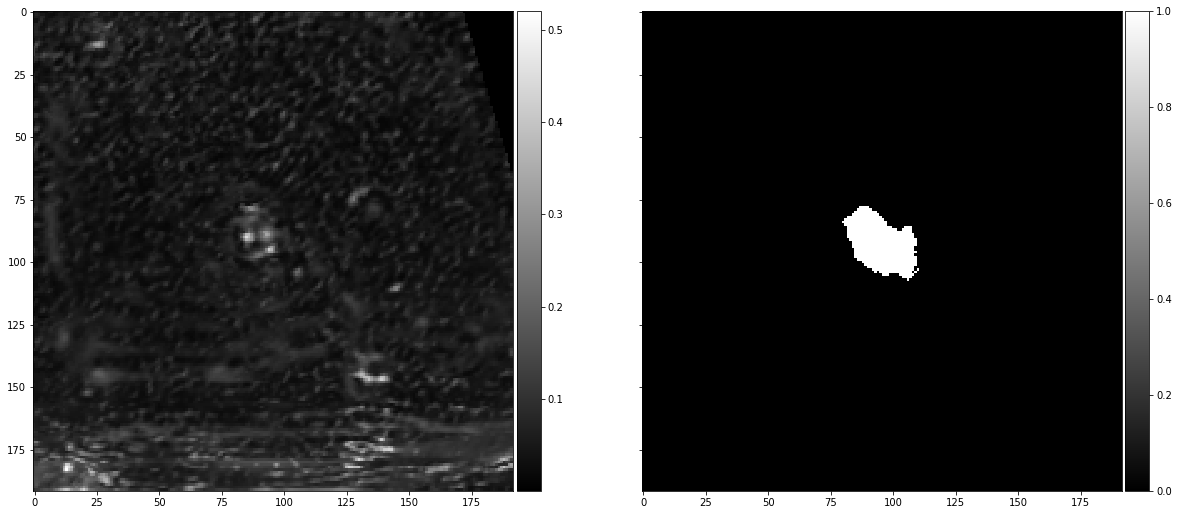

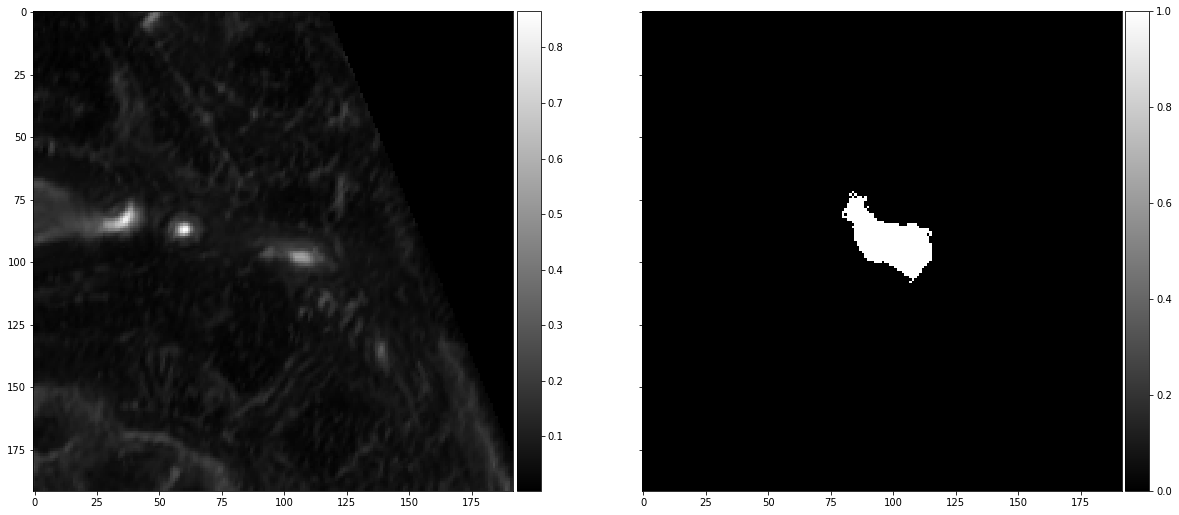

In [12]:
######################################################
# Plot
######################################################
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['figure.figsize'] = (20.0, 10.0)
def implot(mp,ax):
    im = ax.imshow(mp.astype(np.float32), cmap='gray')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
 
for i in range(20):
    j = np.random.randint(N)
    im = X[j,:,:,0].astype(float)
    seg,conts = DRLS(im,rad=R,alpha=alpha,lamda=lamda)
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    implot(im,ax1)
    implot(seg,ax2)
    plt.tight_layout
    plt.show()

In [7]:
mhas = open('images.txt').readlines()
mhas = [i.replace('\n','') for i in mhas]
# mhas = [i.split('/')[-1] for i in mhas]
# mhas = ['./data/'+i for i in mhas]

truths = open('truths.txt').readlines()
truths = [i.replace('\n','') for i in truths]

paths = open('paths.txt').readlines()
paths = [i.replace('\n','') for i in paths]

groups = open('groups.txt').readlines()
groups = [i.replace('\n','') for i in groups]

ct_test = open('ct_test.txt').readlines()
ct_test = [i.replace('\n','') for i in ct_test]

mr_test = open('mr_test.txt').readlines()
mr_test = [i.replace('\n','') for i in mr_test]

test_images = []
test_images_mr = []
for i in range(len(mhas)):
    if any([c in mhas[i] for c in ct_test]):
        test_images.append((mhas[i],truths[i],paths[i],groups[i]))
    
    if any([c in mhas[i] for c in mr_test]):
        test_images_mr.append((mhas[i],truths[i],paths[i],groups[i]))
    
print test_images
print test_images_mr

[('/home/marsdenlab/datasets/vascular_data/OSMSC0004/OSMSC0004-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0004/0004_0001/0004_0001-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0004/0004_0001/0004_0001-cm.paths', '/home/marsdenlab/datasets/vascular_data/OSMSC0004/0004_0001/0004_0001_groups-cm'), ('/home/marsdenlab/datasets/vascular_data/OSMSC0113/OSMSC0113-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0113/0113_0003/0113_0003-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0113/0113_0003/0113_0003-cm.paths', '/home/marsdenlab/datasets/vascular_data/OSMSC0113/0113_0003/0113_0003_groups-cm'), ('/home/marsdenlab/datasets/vascular_data/OSMSC0118/OSMSC0118-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0118/0118_1000/0118_1000-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0118/0118_1000/0118_1000-cm.paths', '/home/marsdenlab/datasets/vascular_data/OSMSC0118/0118_1000/0118_1000_groups-cm'), ('/home/marsdenlab/datasets/vascular_data/OSMSC0

In [8]:
def batch_seg(X,crop_dims):
    N=X.shape[0]
    ypred=np.zeros((N,crop_dims,crop_dims,1)).astype(float)

    for i in range(0,N):
        img = X[i,:,:,0]
        seg,cont = DRLS(img,rad=R,alpha=alpha,lamda=lamda)

        ypred[i,:,:,0] = seg
    return ypred.copy()

def ct_norm(x,im):
    return (1.0*x+1000)/(2000)

def mr_norm(x,im):
    max_ = im.GetScalarRange()[1]
    min_ = im.GetScalarRange()[0]
    print min_,max_
    return (1.0*x-min_)/(max_-min_)

ext = [127, 127]
DIMS = [128,128]
ISOVALUE=0.5
NUM_MODES = 5

In [9]:
utility.gen_groups(test_images,batch_seg,ct_norm,
                ext,DIMS,ISOVALUE,NUM_MODES,DIMS[0],'drls','./pred_groups')

/home/marsdenlab/datasets/vascular_data/OSMSC0004/OSMSC0004-cm.mha
(0.05859379842877388, 0.05859379842877388, 0.05859379842877388)
profunda_branch_left
profunda_left
knee_right
profunda_branch_right
anterior_tibial_right
knee_left
anterior_tibial_left
posterior_tibial_right
femoral_right
posterior_tibial_left
femoral_left
aorta_leg_right
celiac
leg_left
renal_right
superior_mesenteric_artery
internal_iliac_right
renal_left
profunda_right
internal_iliac_left
/home/marsdenlab/datasets/vascular_data/OSMSC0113/OSMSC0113-cm.mha
(0.0390625, 0.0390625, 0.0390625)
N_RCA3
N_RCA
RCA
RCA2
N_RCA2
N_LCA4
N_LCA5
LCA
N_LCA
N_LCA2
N_LCA3
LCCA
LSA_b5
LSA_b3
LSA_b4
LSA_b1
LSA_b2
LSA
LIMA
RCCA
RSA
RSA_b1
RSA_b2
aorta
LCA2
/home/marsdenlab/datasets/vascular_data/OSMSC0118/OSMSC0118-cm.mha
(0.040820300579071045, 0.040820300579071045, 0.040820300579071045)
LPA_012
LPA_010
LPA_011
RPA_015
RPA_014
RPA_017
RPA_016
RPA_011
RPA_010
RPA_013
RPA_012
RPA_0082
RPA_0081
LPA_009
LPA_001
LPA
LPA_003
LPA_002
LPA_005
LPA

In [10]:
utility.gen_groups(test_images_mr,batch_seg,mr_norm,
                ext,DIMS,ISOVALUE,NUM_MODES,DIMS[0],'drls','./pred_groups')

/home/marsdenlab/datasets/vascular_data/OSMSC0006/OSMSC0006-cm.mha
(0.07812999933958054, 0.07812999933958054, 0.07812999933958054)
right_iliac
0.0 6950.0
celiac_branch
0.0 6950.0
left_internal_iliac
0.0 6950.0
celiac_trunk
0.0 6950.0
renal_right
0.0 6950.0
right_internal_iliac
0.0 6950.0
renal_left
0.0 6950.0
aorta
0.0 6950.0
superior_mesentaric
0.0 6950.0
/home/marsdenlab/datasets/vascular_data/OSMSC0078/OSMSC0078-cm.mha
(0.04297000169754028, 0.04297000169754028, 0.04297000169754029)
RAICA
0.0 2237.0
LPICA
0.0 2237.0
LAICA
0.0 2237.0
RPCA_branch1
0.0 2237.0
RSCA
0.0 2237.0
LSCA_Superior_Cerebellar_Artery
0.0 2237.0
LPCA_branch
0.0 2237.0
LPCA_branch2
0.0 2237.0
LVA
0.0 2237.0
LPCA
0.0 2237.0
LPCA_branch_3
0.0 2237.0
RVA_2
0.0 2237.0
/home/marsdenlab/datasets/vascular_data/OSMSC0101/OSMSC0101-cm.mha
(0.06835939735174179, 0.06835939735174179, 0.06835939735174179)
rt_carotid
0.0 4499.0
btrunk
0.0 4499.0
aorta
0.0 4499.0
subclavian
0.0 4499.0
carotid
0.0 4499.0
/home/marsdenlab/datasets/v

In [11]:
# /home/marsdenlab/datasets/vascular_data/OSMSC0189/OSMSC0189-cm.mha
# /home/marsdenlab/datasets/vascular_data/cabg10/cabg10-image.mha
# /home/marsdenlab/datasets/vascular_data/cabg11/cabg11-image.mha
# /home/marsdenlab/datasets/vascular_data/cabg5/cabg5-image.mha

# /media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0188-cm_oof.mha
# /media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0189-cm_oof.mha
# /media/marsdenlab/Data2/datasets/DeepLofting/OOF/cabg10-image_oof.mha
# /media/marsdenlab/Data2/datasets/DeepLofting/OOF/cabg11-image_oof

oof_ct_tups = []
oof_mr_tups = []
def oof_norm(x):
    return x

for t in test_images:
    s = t[0]
    im_name = s.split('/')[-2]
    s = s.replace('/'+im_name+'/','/')
    s = s.replace('/home/marsdenlab/datasets/vascular_data','/media/marsdenlab/Data2/datasets/DeepLofting/OOF')
    s = s.replace('.mha','_oof.mha')
    print s
    
    oof_ct_tups.append((s,t[1],t[2],t[3]))
    
for t in test_images_mr:
    s = t[0]
    im_name = s.split('/')[-2]
    s = s.replace('/'+im_name+'/','/')
    s = s.replace('/home/marsdenlab/datasets/vascular_data','/media/marsdenlab/Data2/datasets/DeepLofting/OOF')
    s = s.replace('.mha','_oof.mha')
    print s
    
    oof_mr_tups.append((s,t[1],t[2],t[3]))
    
print oof_ct_tups

/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0004-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0113-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0118-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0129-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0144-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0148-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0177-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0180-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/cabg11-image_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0006-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0078-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0101-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0110-cm_oof.mha
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0171-cm_oof.mha
/media/marsdenlab/Da

In [ ]:
mu = 0.3
lamda = 1.5
alpha = 0.6
R = 40

In [ ]:
utility.gen_groups(oof_ct_tups,batch_seg,ct_norm,
                ext,DIMS,ISOVALUE,NUM_MODES,DIMS[0],'oof','./pred_groups')

utility.gen_groups(oof_mr_tups,batch_seg,mr_norm,
                ext,DIMS,ISOVALUE,NUM_MODES,DIMS[0],'oof','./pred_groups')

/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0004-cm_oof.mha
(0.05859379842877388, 0.05859379842877388, 0.05859379842877388)
profunda_branch_left
profunda_left
knee_right
profunda_branch_right
anterior_tibial_right
knee_left
anterior_tibial_left
posterior_tibial_right
femoral_right
posterior_tibial_left
femoral_left
aorta_leg_right
celiac
leg_left
renal_right
superior_mesenteric_artery
internal_iliac_right
renal_left
profunda_right
internal_iliac_left
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0113-cm_oof.mha
(0.0390625, 0.0390625, 0.0390625)
N_RCA3
N_RCA
RCA
RCA2
N_RCA2
N_LCA4
N_LCA5
LCA
N_LCA
N_LCA2
N_LCA3
LCCA
LSA_b5
LSA_b3
LSA_b4
LSA_b1
LSA_b2
LSA
LIMA
RCCA
RSA
RSA_b1
RSA_b2
aorta
LCA2
/media/marsdenlab/Data2/datasets/DeepLofting/OOF/OSMSC0118-cm_oof.mha
(0.040820300579071045, 0.040820300579071045, 0.040820300579071045)
LPA_012
LPA_010
LPA_011
RPA_015
RPA_014
RPA_017
RPA_016
RPA_011
RPA_010
RPA_013
RPA_012
RPA_0082
RPA_0081
LPA_009
LPA_001
LPA
LPA_003
LPA_002
LP